# COVID-19 analysis
### Johns Hopkins University data

In [1]:
from read_data import clean_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.set()

In [3]:
# read dayly reports from Johns Hopkins University into one data frame
df = clean_data()

In [4]:
df.tail()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Date
258606,"Madison, WI",US,1.0,0.0,0.0,2020-02-05
258607,"Orange, CA",US,1.0,0.0,0.0,2020-02-01
258608,"San Antonio, TX",US,1.0,0.0,0.0,2020-02-13
258609,"Seattle, WA",US,1.0,0.0,1.0,2020-02-09
258610,"Tempe, AZ",US,1.0,0.0,0.0,2020-02-01


### Data exploration

In [5]:
df[df.Country_Region == 'Argentina'].sort_values(by='Date').tail(5)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Date
108416,NaN,Argentina,19268.0,583.0,5896.0,2020-06-04
112136,NaN,Argentina,20197.0,608.0,5993.0,2020-06-05
125715,NaN,Argentina,21037.0,632.0,6088.0,2020-06-06
92117,NaN,Argentina,22020.0,648.0,6180.0,2020-06-07
228294,NaN,Argentina,22794.0,664.0,6909.0,2020-06-08


This is cumulative data

In [6]:
df[df.Country_Region == 'Mainland China'].sort_values(by='Date').head(15)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Date
234913,Chongqing,Mainland China,6.0,NaN,NaN,2020-01-22
234927,Jiangsu,Mainland China,1.0,NaN,NaN,2020-01-22
234926,Inner Mongolia,Mainland China,NaN,NaN,NaN,2020-01-22
234928,Jiangxi,Mainland China,2.0,NaN,NaN,2020-01-22
234929,Jilin,Mainland China,NaN,NaN,NaN,2020-01-22
234930,Liaoning,Mainland China,2.0,NaN,NaN,2020-01-22
234932,Ningxia,Mainland China,1.0,NaN,NaN,2020-01-22
234933,Qinghai,Mainland China,NaN,NaN,NaN,2020-01-22
234934,Shaanxi,Mainland China,NaN,NaN,NaN,2020-01-22
234936,Shanghai,Mainland China,9.0,NaN,NaN,2020-01-22


### Data wrangling

Group by date and country regardless the Province/State

In [7]:
# we don't care about Province/state
countries = df.groupby(['Date','Country_Region'], as_index=False).agg({'Confirmed': sum, 'Deaths': sum, 'Recovered': sum})

In [8]:
countries.head()

,Date,Country_Region,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Japan,2.0,0.0,0.0
2,2020-01-22,Macau,1.0,0.0,0.0
3,2020-01-22,Mainland China,547.0,17.0,28.0
4,2020-01-22,South Korea,1.0,0.0,0.0


In [9]:
# check
df[df['Country_Region']=='Mainland China'].sort_values('Date').head(31).sum()

Province_State    ChongqingJiangsuInner MongoliaJiangxiJilinLiao...
Country_Region    Mainland ChinaMainland ChinaMainland ChinaMain...
Confirmed                                                       547
Deaths                                                           17
Recovered                                                        28
dtype: object

In [10]:
countries[countries['Country_Region']=='Mainland China'].Confirmed

3         547.0
14        639.0
28        916.0
40       1399.0
55       2062.0
72       2863.0
90       5494.0
109      6070.0
130      8124.0
153      9812.0
174     11852.0
188     16606.0
195     19692.0
204     23713.0
212     27436.0
221     30562.0
231     34056.0
240     36759.0
252     39890.0
261     42226.0
272     44268.0
286     44726.0
301     59939.0
310     66183.0
316     68452.0
328     70357.0
341     72345.0
350     74138.0
358     74563.0
367     74980.0
381     75957.0
395     76741.0
405     77065.0
420     77154.0
440     77620.0
467     77991.0
498     79155.0
528     78421.0
564     79068.0
612     79846.0
650     80745.0
694     80566.0
750     80031.0
797     80683.0
855     82188.0
911     80461.0
974     84987.0
1039    76995.0
1104    77201.0
1222        0.0
Name: Confirmed, dtype: float64

The las value makes no sense, we can't have a null value for the Confirmed cases since this is cumulative data.

In [11]:
countries = countries[countries.Confirmed > 0]

Let's take a look to the countries list:

In [12]:
countries.Country_Region.sort_values().unique()

array([' Azerbaijan', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Est

A lot of names are the same
- china and mainland china
- ' Azerbaijan' has a space
- Bahamas ; Bahamas, The and The Bahamas
- Diamond princess, MS zaandam and Cruise ship -> It's not a country
- Gambia and Gambia, The
- Hong Kong and Hong Kong SAR
- Iran and Iran (Islamic Republic of)
- Korea, South ; South Korea and Republic of Korea
- Macao SAR and Macau
- Moldova and Republic of Moldova
- Congo (Brazzaville) and Republic of the Congo
- Russia and Russia Federation
- st. martin and saint martin
- Taiwan and Taiwan*
- Gambia and The Gambia
- United Kingdom and UK
- Viet Nam and Vietnam
- West Bank and Gaza, and occupied Palestinian territory

### Data Cleaning

Unify country-names: Since this is cumulative data, we have to be very carefully and look case by case

- China and Mainland China

In [13]:
china = countries[countries.Country_Region == 'China']

In [14]:
m_china = countries[countries.Country_Region == 'Mainland China']

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


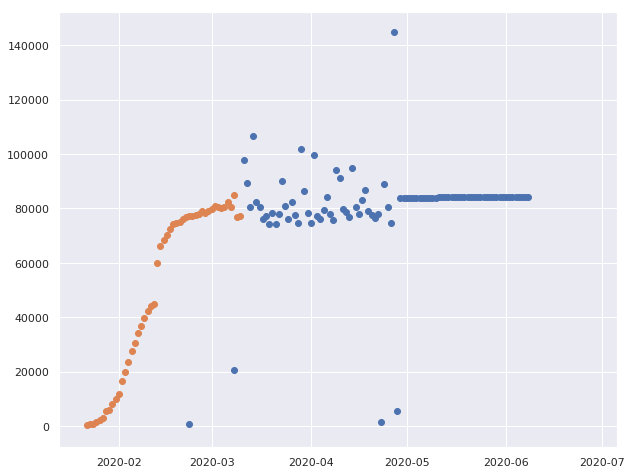

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=china)
plt.scatter(x='Date', y='Confirmed', data=m_china);

In [16]:
countries.Country_Region.replace({'Mainland China': 'China'}, inplace=True)

- Azerbaijan 
Typo

In [17]:
countries.Country_Region.replace({' Azerbaijan': 'Azerbaijan'}, inplace=True)

- Bahamas

In [18]:
bahamas = countries[countries.Country_Region == 'Bahamas']
bahamas_t = countries[countries.Country_Region == 'Bahamas, The']
t_bahamas = countries[countries.Country_Region == 'The Bahamas']

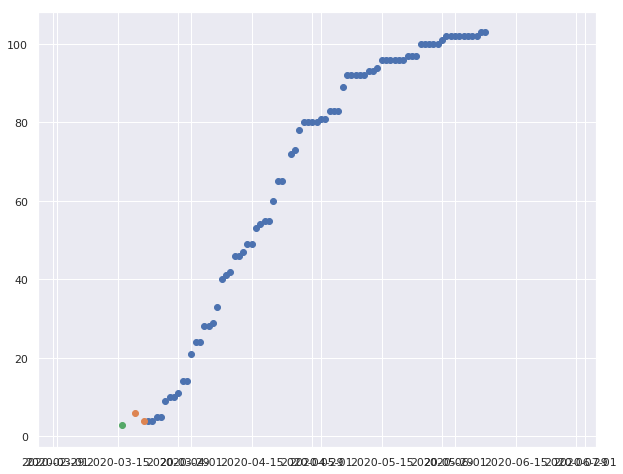

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=bahamas)
plt.scatter(x='Date', y='Confirmed', data=bahamas_t)
plt.scatter(x='Date', y='Confirmed', data=t_bahamas);

In this case we can simply keep the data from Bahamas (see next step)

- Gambia

In [20]:
gambia = countries[countries.Country_Region == 'Gambia']
gambia_t = countries[countries.Country_Region == 'Gambia, The']

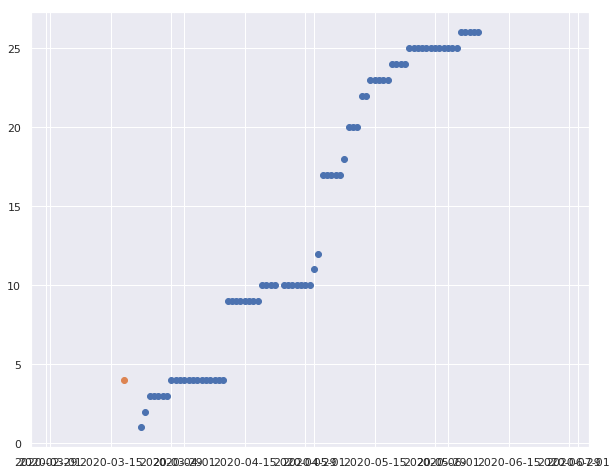

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=gambia)
plt.scatter(x='Date', y='Confirmed', data=gambia_t);

Same here

- Hong Kong and Hong Kong SAR

In [22]:
hk = countries[countries.Country_Region == 'Hong Kong']
hks = countries[countries.Country_Region == 'Hong Kong SAR']

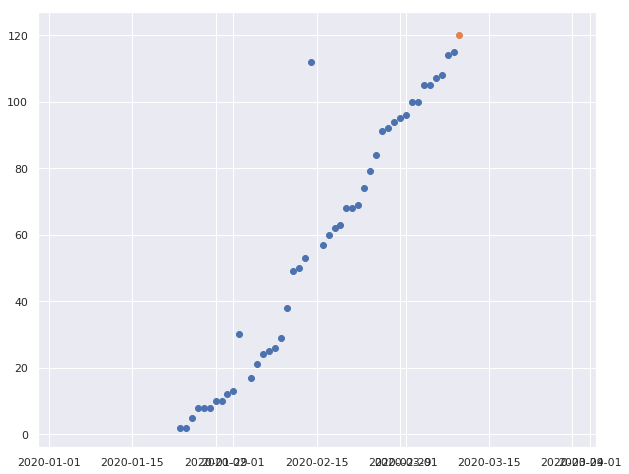

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=hk)
plt.scatter(x='Date', y='Confirmed', data=hks);

In [24]:
countries.Country_Region.replace({'Hong Kong SAR': 'Hong Kong'}, inplace=True)

- Iran and Iran (Islamic Republic of)

In [25]:
iran = countries[countries.Country_Region == 'Iran']
iran_is = countries[countries.Country_Region == 'Iran (Islamic Republic of)']

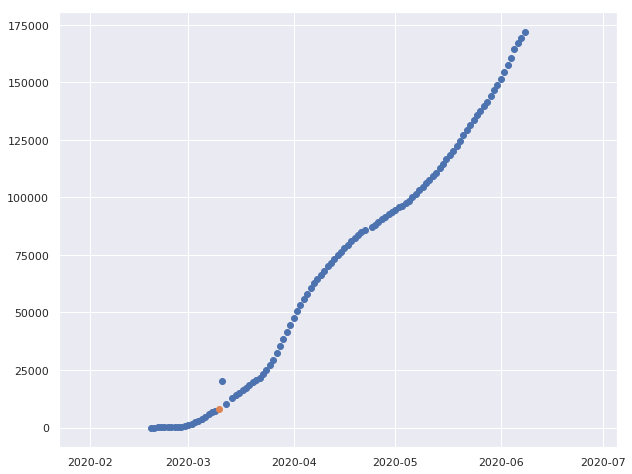

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=iran)
plt.scatter(x='Date', y='Confirmed', data=iran_is);

In [27]:
countries.Country_Region.replace({'Iran (Islamic Republic of)': 'Iran'}, inplace=True)

- Korea, South ; South Korea and Republic of Korea

In [28]:
sk = countries[countries.Country_Region == 'South Korea']
ks = countries[countries.Country_Region == 'Korea, South']
rk = countries[countries.Country_Region == 'Republic of Korea']

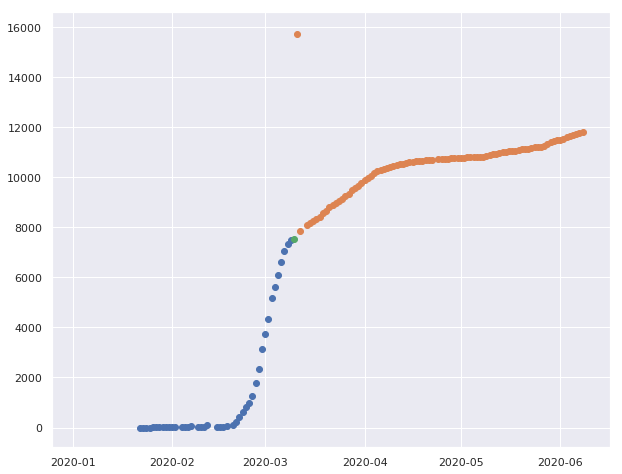

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=sk)
plt.scatter(x='Date', y='Confirmed', data=ks)
plt.scatter(x='Date', y='Confirmed', data=rk);

In [30]:
countries.Country_Region.replace({'Korea, South': 'South Korea', 'Republic of Korea':'South Korea'}, inplace=True)

- Macao SAR and Macau

In [31]:
msar = countries[countries.Country_Region == 'Macao SAR']
m = countries[countries.Country_Region == 'Macau']

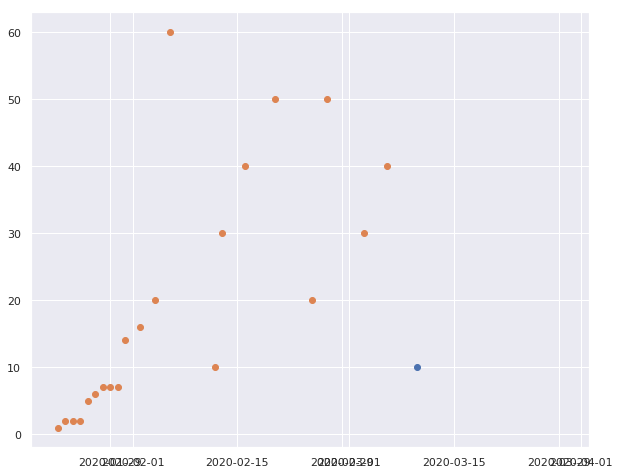

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=msar)
plt.scatter(x='Date', y='Confirmed', data=m);

In [33]:
countries.Country_Region.replace({'Macao SAR': 'Macau'}, inplace=True)

- Moldova and Republic of Moldova

In [34]:
mold = countries[countries.Country_Region == 'Moldova']
r_mold = countries[countries.Country_Region == 'Republic of Moldova']

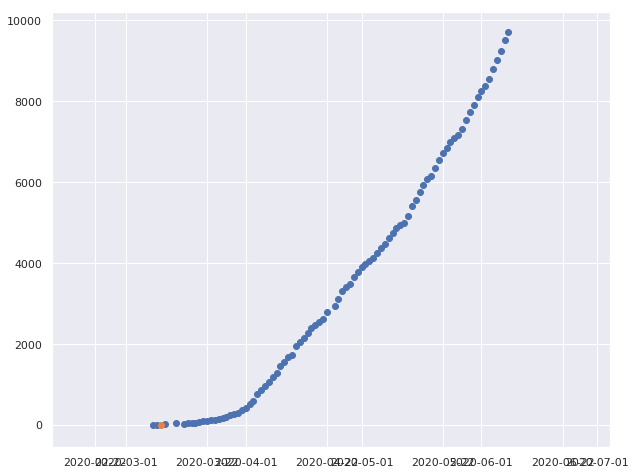

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=mold)
plt.scatter(x='Date', y='Confirmed', data=r_mold);

In [36]:
countries.Country_Region.replace({'Republic of Moldova': 'Moldova'}, inplace=True)

- Congo (Brazzaville) and Republic of the Congo

In [37]:
congo = countries[countries.Country_Region == 'Congo (Brazzaville)']
r_congo = countries[countries.Country_Region == 'Republic of the Congo']

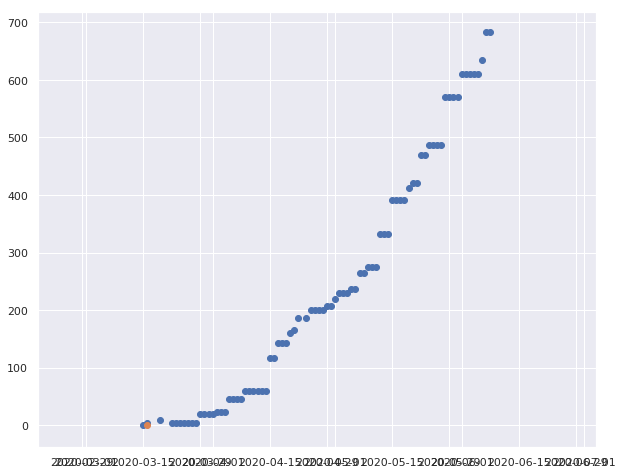

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=congo)
plt.scatter(x='Date', y='Confirmed', data=r_congo);

delete this entry (see next step)

- Russia and Russia Federation

In [39]:
rusia = countries[countries.Country_Region == 'Russia']
rusia_f = countries[countries.Country_Region == 'Russian Federation']

In [40]:
rusia_f

,Date,Country_Region,Confirmed,Deaths,Recovered
1126,2020-03-10,Russian Federation,10.0,0.0,3.0


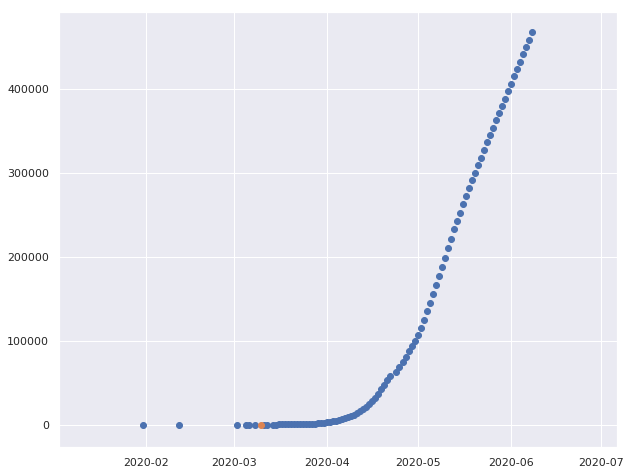

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=rusia)
plt.scatter(x='Date', y='Confirmed', data=rusia_f);

same here

- st. martin and saint martin

In [42]:
st = countries[countries.Country_Region == 'St. Martin']
sm = countries[countries.Country_Region == 'Saint Martin']

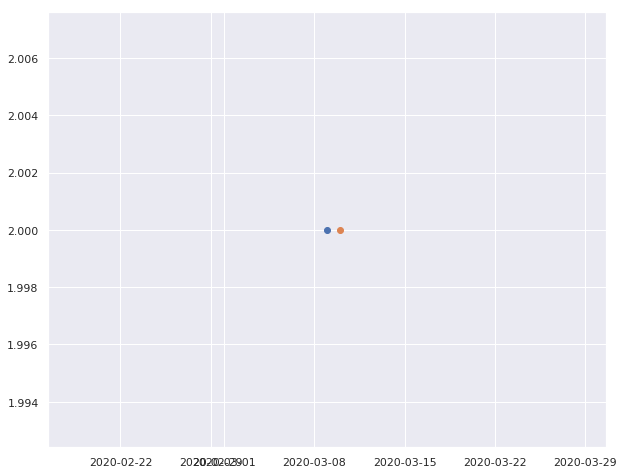

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=st)
plt.scatter(x='Date', y='Confirmed', data=sm);

same here

- Taiwan and Taiwan*

In [44]:
tai = countries[countries.Country_Region == 'Taiwan']
taiwan = countries[countries.Country_Region == 'Taiwan*']

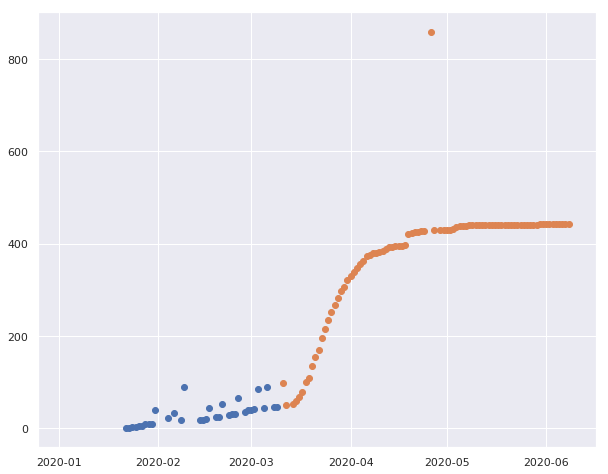

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=tai)
plt.scatter(x='Date', y='Confirmed', data=taiwan);

In [46]:
countries.Country_Region.replace({'Taiwan*': 'Taiwan'}, inplace=True)

- Gambia and The Gambia

In [47]:
gambia = countries[countries.Country_Region == 'Gambia']
t_gambia = countries[countries.Country_Region == 'The Gambia']

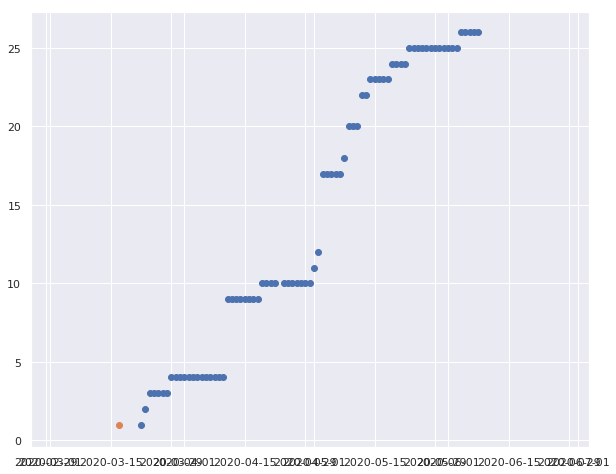

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=gambia)
plt.scatter(x='Date', y='Confirmed', data=t_gambia);

In [49]:
countries.Country_Region.replace({'The Gambia': 'Gambia'}, inplace=True)

- United Kingdom and UK

In [50]:
uni = countries[countries.Country_Region == 'United Kingdom']
uk = countries[countries.Country_Region == 'UK']

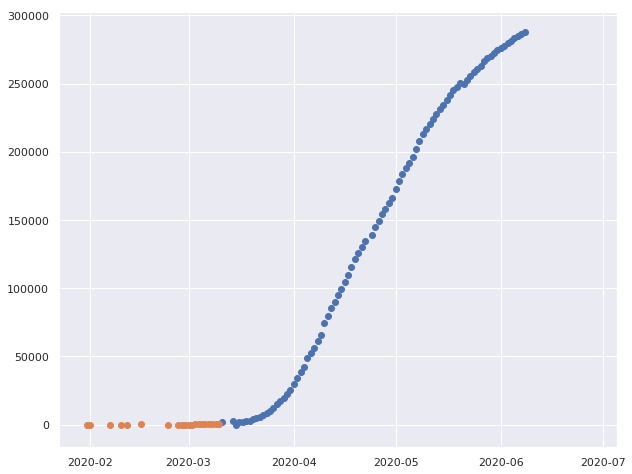

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=uni)
plt.scatter(x='Date', y='Confirmed', data=uk);

In [52]:
countries.Country_Region.replace({'UK': 'United Kingdom'}, inplace=True)

- Viet Nam and Vietnam

In [53]:
vietnam = countries[countries.Country_Region == 'Vietnam']
viet = countries[countries.Country_Region == 'Viet Nam']

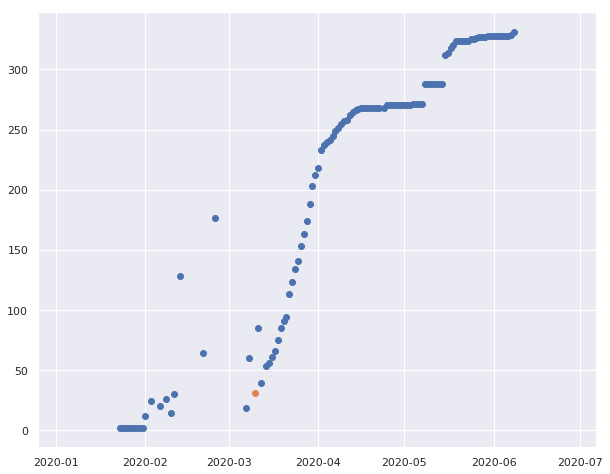

In [54]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=vietnam)
plt.scatter(x='Date', y='Confirmed', data=viet);

In [55]:
countries.Country_Region.replace({'Viet Nam': 'Vietnam'}, inplace=True)

- West Bank and Gaza, and occupied Palestinian territory

In [56]:
west = countries[countries.Country_Region == 'West Bank and Gaza']
pal = countries[countries.Country_Region == 'occupied Palestinian territory']

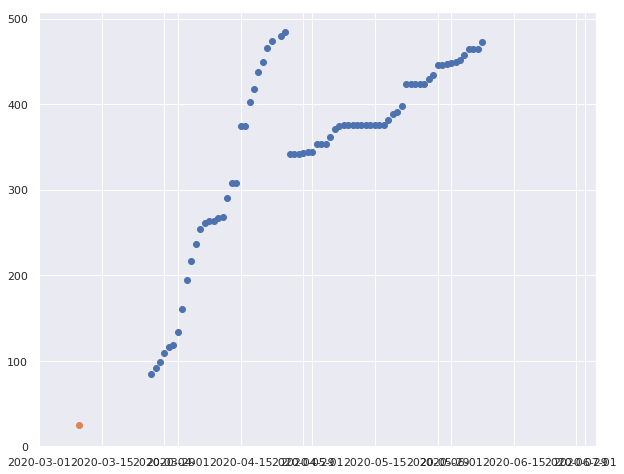

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(x='Date', y='Confirmed', data=west)
plt.scatter(x='Date', y='Confirmed', data=pal);

In [58]:
countries.Country_Region.replace({'occupied Palestinian territory': 'West Bank and Gaza'}, inplace=True)

Keep only the max per date and country

In [59]:
countries = countries.groupby(['Date','Country_Region'], as_index=False).agg({'Confirmed': max, 'Deaths': max, 'Recovered': max})

Number of data-points by country

In [60]:
countries.groupby('Country_Region').Recovered.count().describe()

count    225.000000
mean      74.208889
std       33.749681
min        1.000000
25%       76.000000
50%       84.000000
75%       92.000000
max      139.000000
Name: Recovered, dtype: float64

I will keep only countries with more than 50 data points.

In [61]:
n_points = countries.groupby('Country_Region').Confirmed.count().to_dict()
points = dict((k,str(v)) for k,v in n_points.items())

In [62]:
countries['n_points'] = countries['Country_Region']

In [63]:
countries['n_points'].replace(points,inplace=True)

In [64]:
countries.head()

,Date,Country_Region,Confirmed,Deaths,Recovered,n_points
0,2020-01-22,China,547.0,17.0,28.0,139
1,2020-01-22,Japan,2.0,0.0,0.0,132
2,2020-01-22,Macau,1.0,0.0,0.0,22
3,2020-01-22,South Korea,1.0,0.0,0.0,132
4,2020-01-22,Taiwan,1.0,0.0,0.0,121


In [65]:
#countries[countries.Country_Region == 'Japan']

In [66]:
countries['n_points']=pd.to_numeric(countries.n_points)

In [67]:
data = countries[countries.n_points >= 50]

In [68]:
data.groupby('Country_Region').Confirmed.count().describe()

count    185.000000
mean      88.762162
std       12.677765
min       59.000000
25%       80.000000
50%       87.000000
75%       94.000000
max      139.000000
Name: Confirmed, dtype: float64

> data (df):
- No province/state
- All Confirmed > 0
- Countries with 50 or more data points (reported days) --> 174 Countries

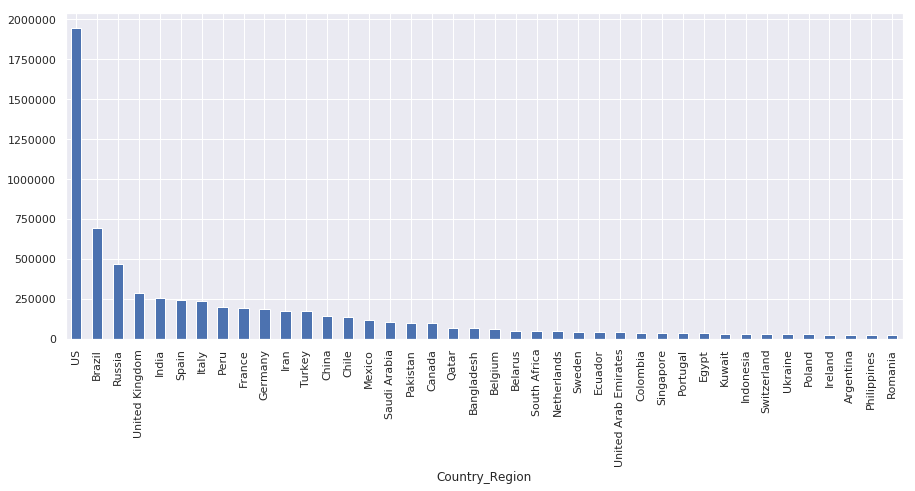

In [69]:
data.groupby('Country_Region').Confirmed.max().sort_values(ascending=False)[0:40].plot(kind='bar',figsize=(15,6));

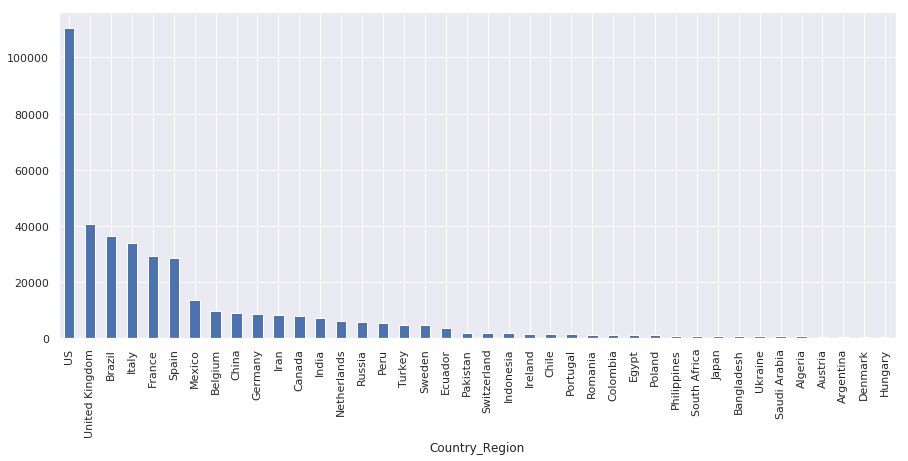

In [70]:
data.groupby('Country_Region').Deaths.max().sort_values(ascending=False)[0:40].plot(kind='bar',figsize=(15,6));

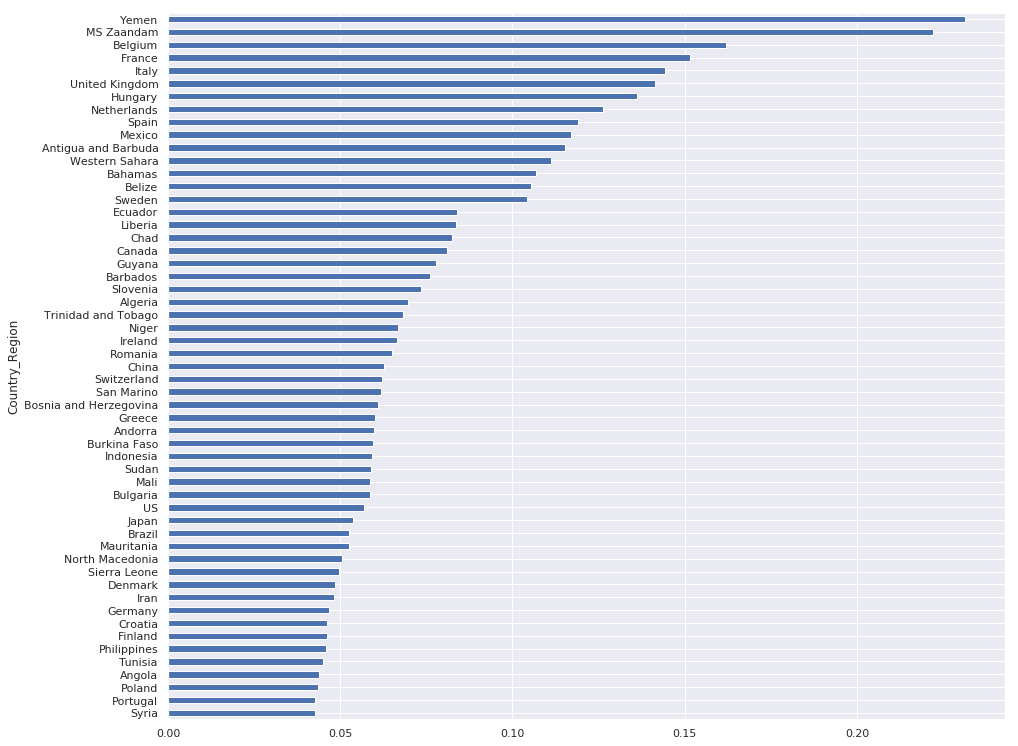

In [71]:
(data.groupby('Country_Region').Deaths.max()/data.groupby('Country_Region').Confirmed.max()).sort_values(ascending=False)[0:55].sort_values().plot(kind='barh',figsize=(15,13));

In [72]:
#rename column
data.rename(columns={'Country_Region':'Country'}, inplace=True)

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [73]:
data.head()

,Date,Country,Confirmed,Deaths,Recovered,n_points
0,2020-01-22,China,547.0,17.0,28.0,139
1,2020-01-22,Japan,2.0,0.0,0.0,132
3,2020-01-22,South Korea,1.0,0.0,0.0,132
4,2020-01-22,Taiwan,1.0,0.0,0.0,121
5,2020-01-22,Thailand,2.0,0.0,0.0,116


Data from countries only:

In [74]:
data = data[data.Country != 'Cruise Ship']
data = data[data.Country != 'Diamond Princess']

### Visual exploration
Since the data is the accumulated one, should always be increasing. For many countries this is not the case.

In [75]:
countries_list = data.Country.sort_values().unique()

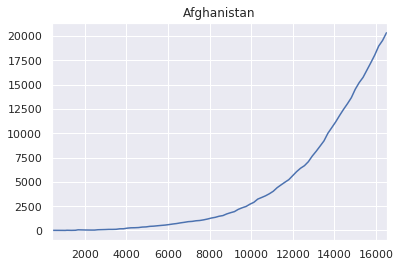

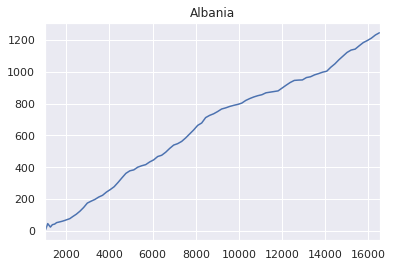

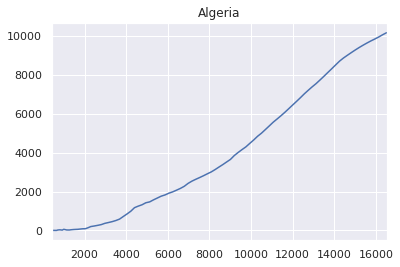

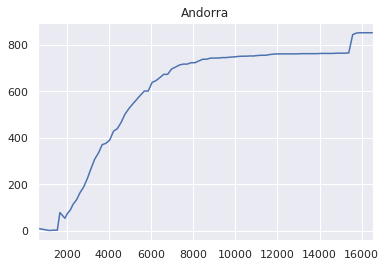

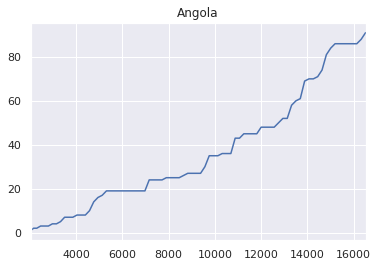

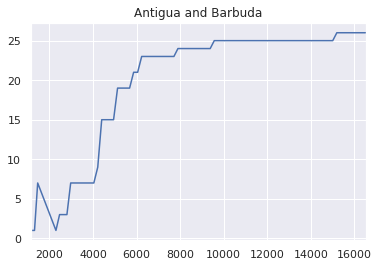

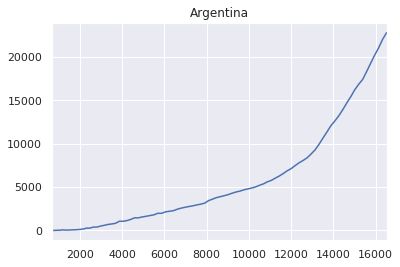

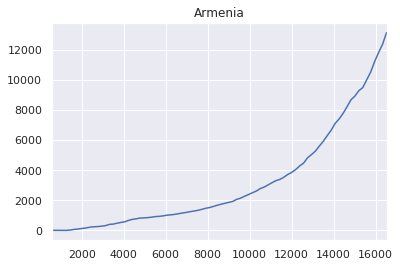

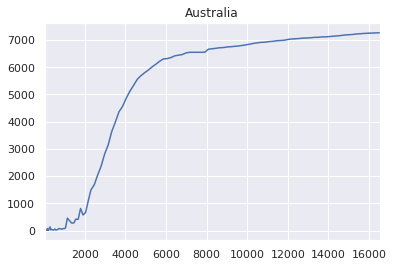

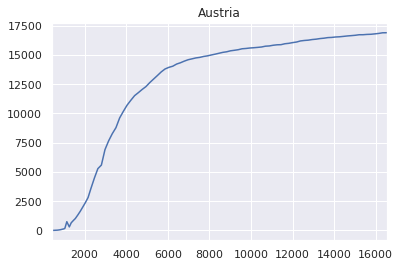

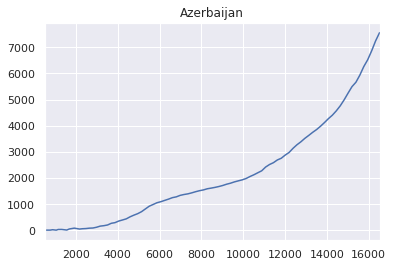

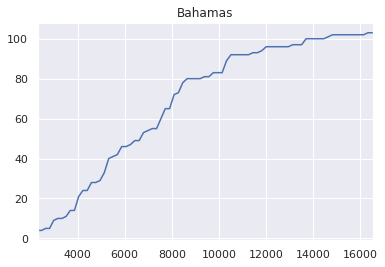

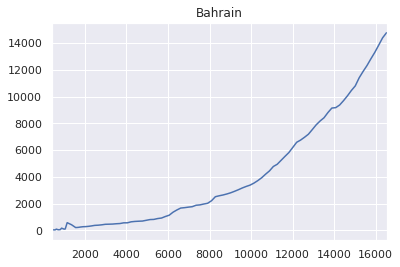

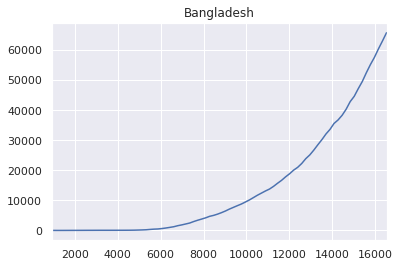

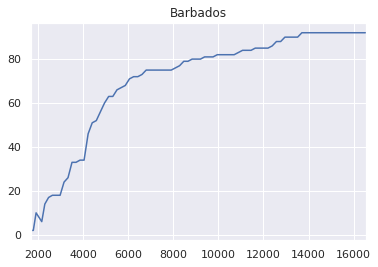

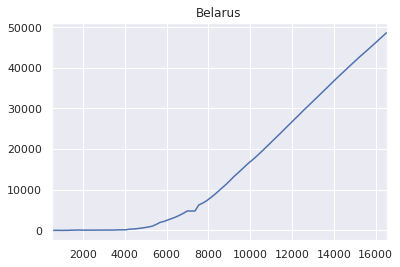

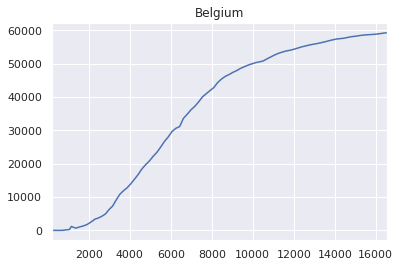

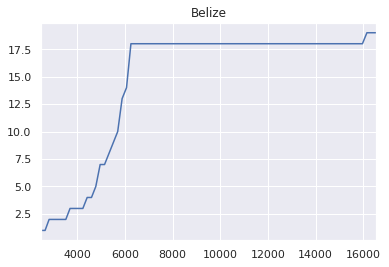

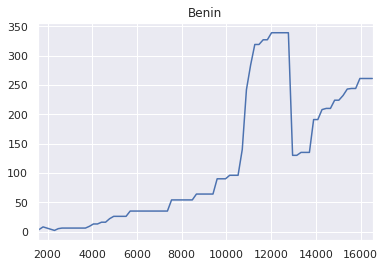

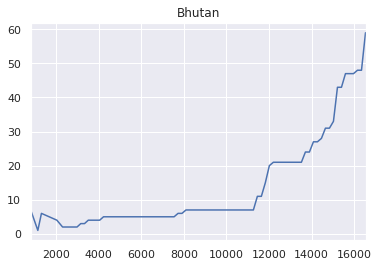

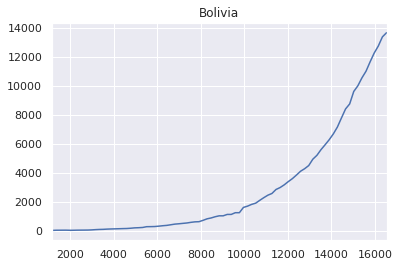

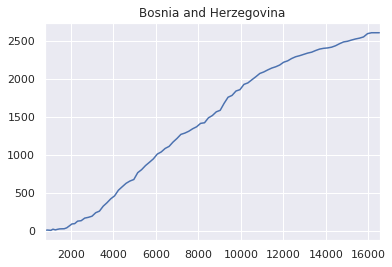

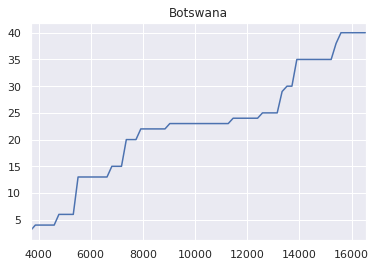

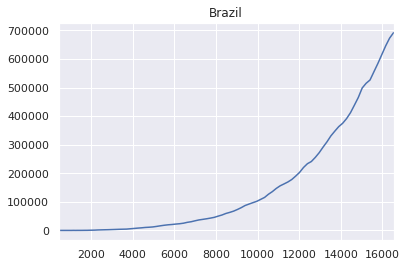

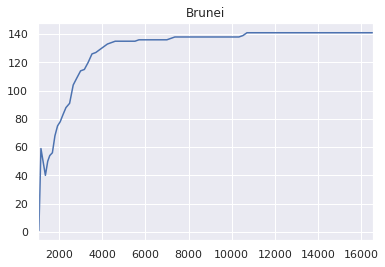

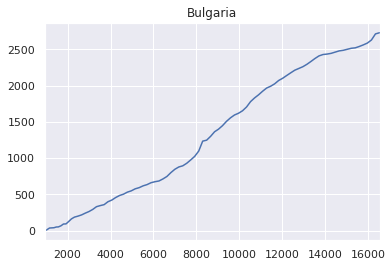

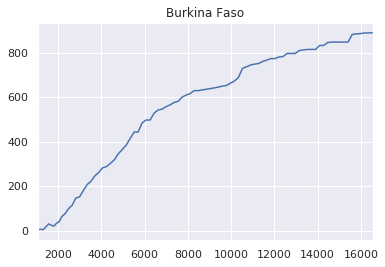

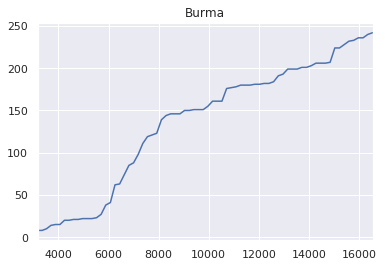

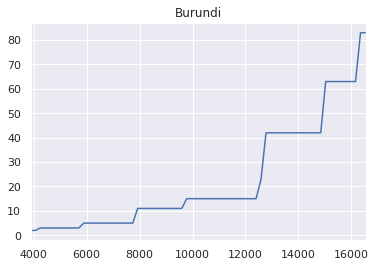

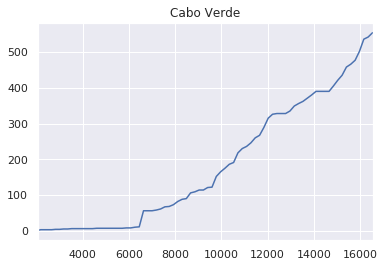

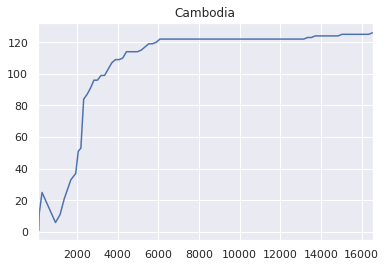

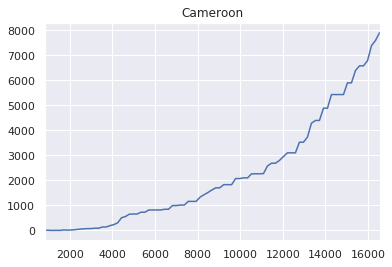

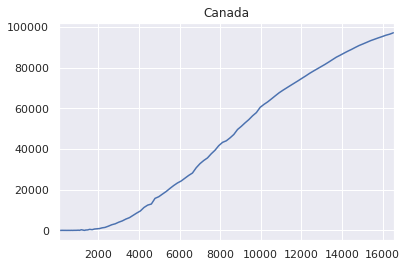

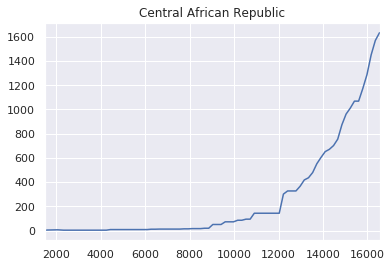

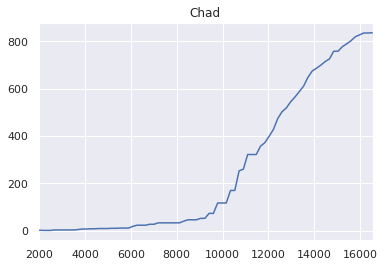

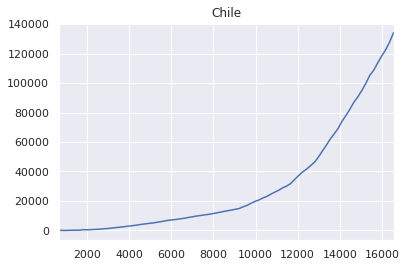

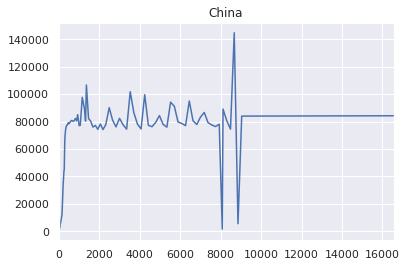

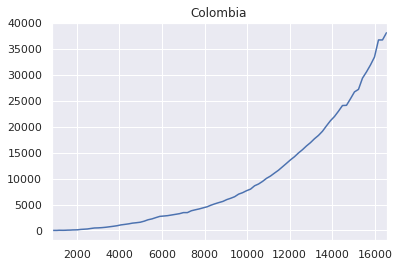

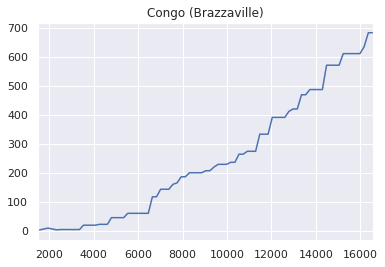

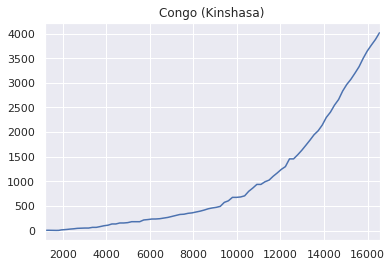

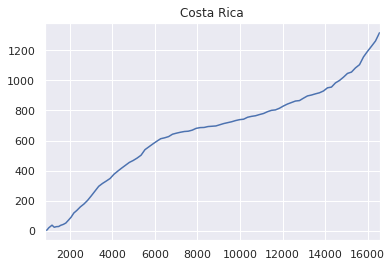

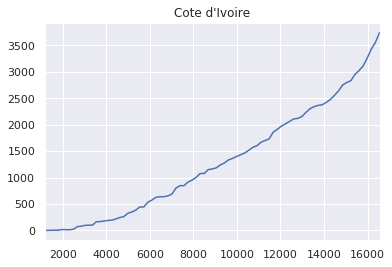

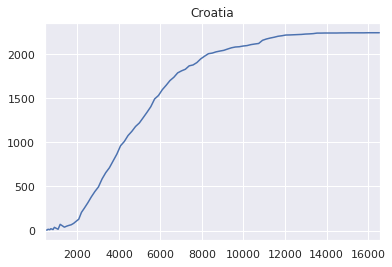

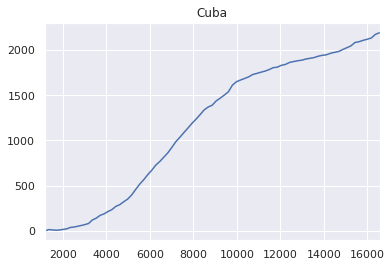

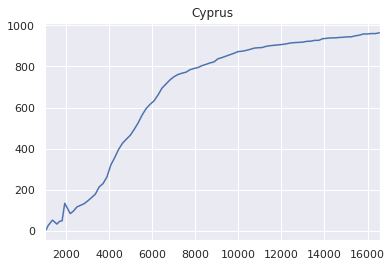

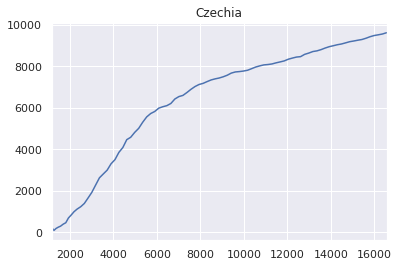

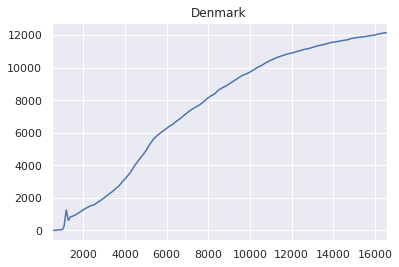

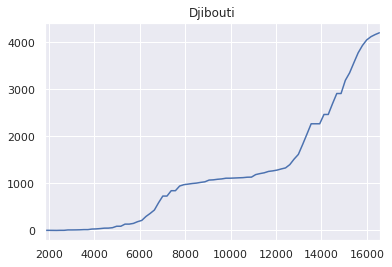

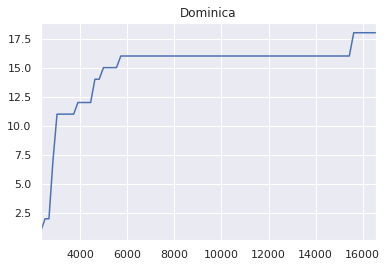

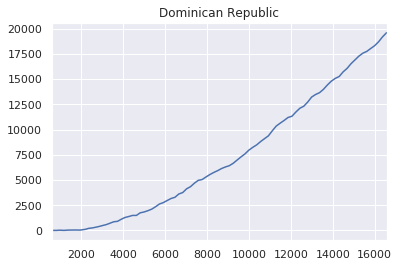

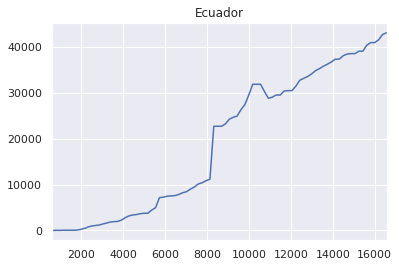

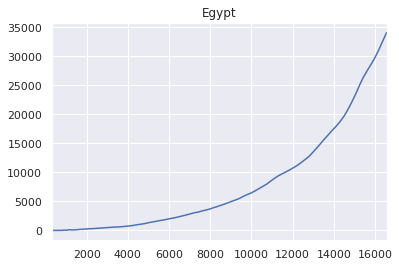

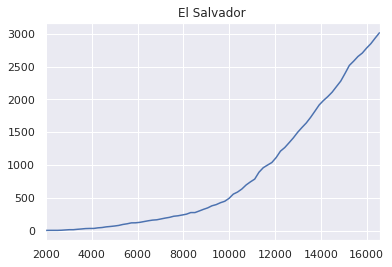

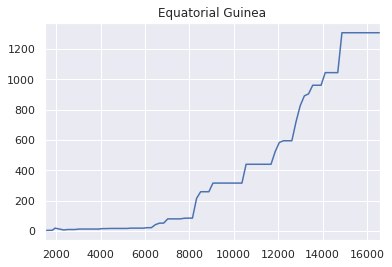

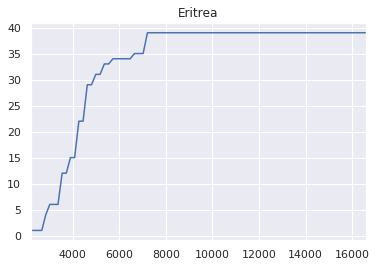

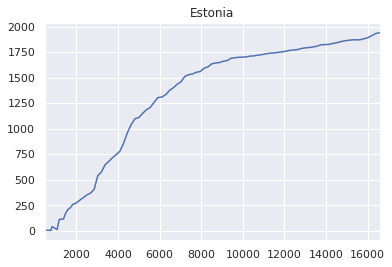

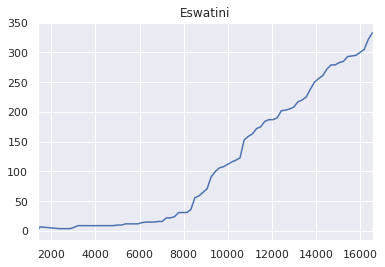

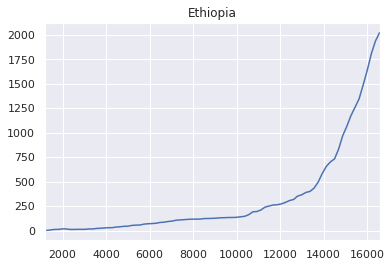

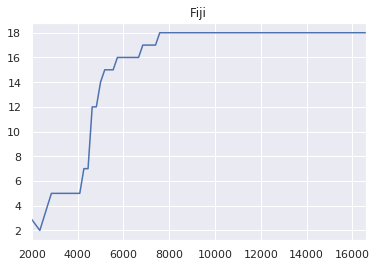

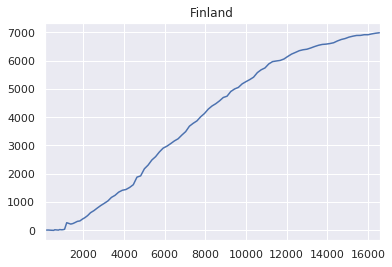

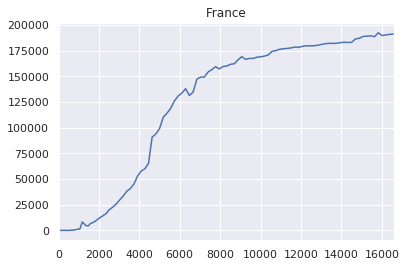

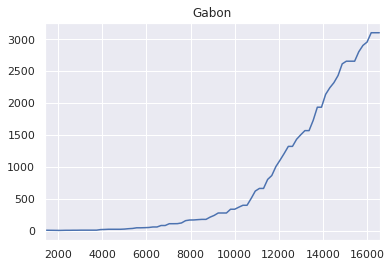

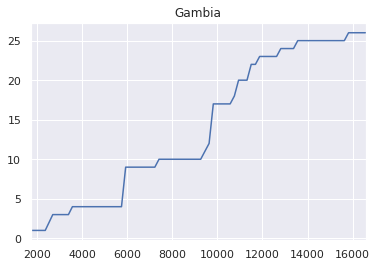

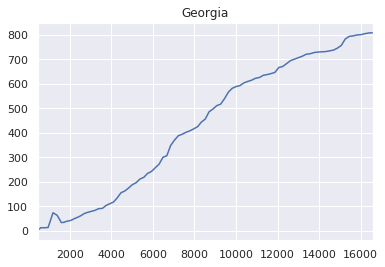

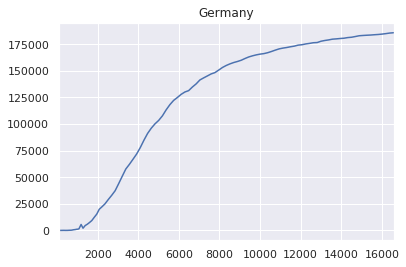

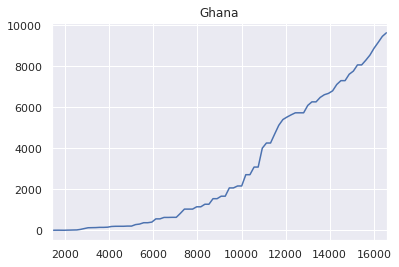

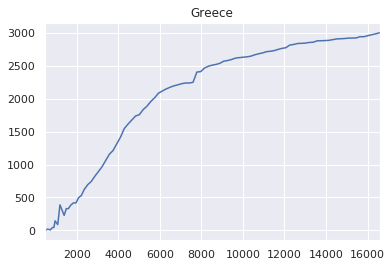

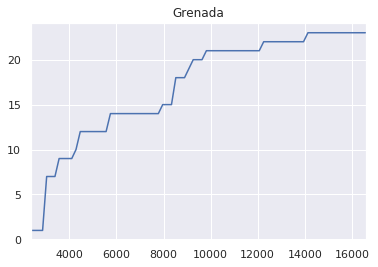

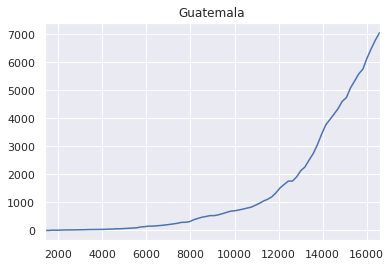

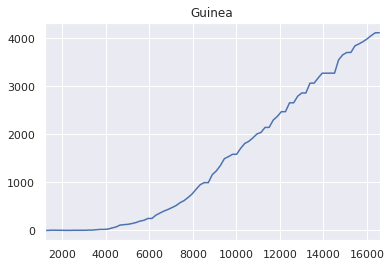

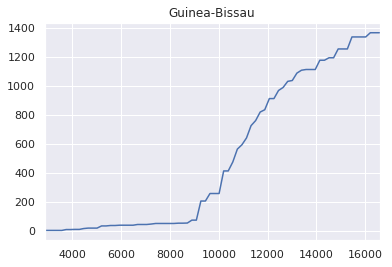

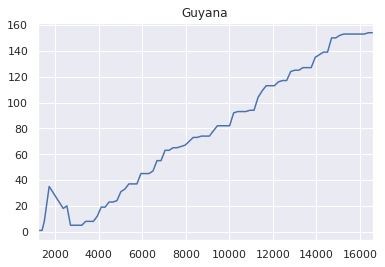

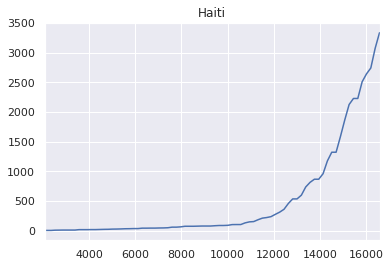

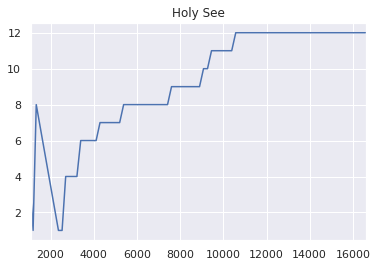

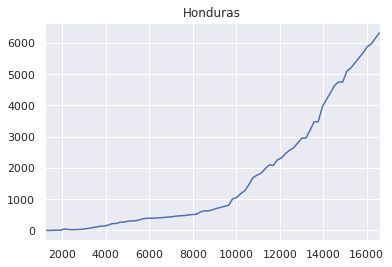

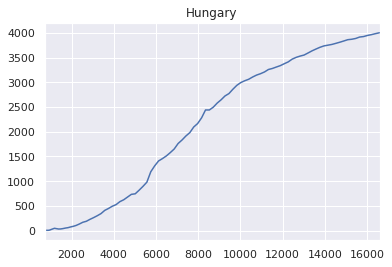

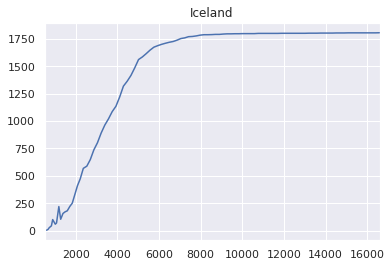

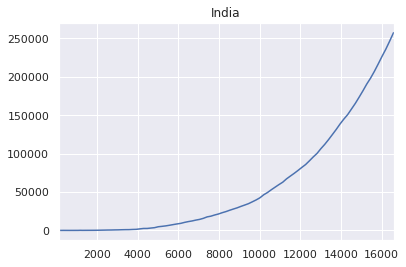

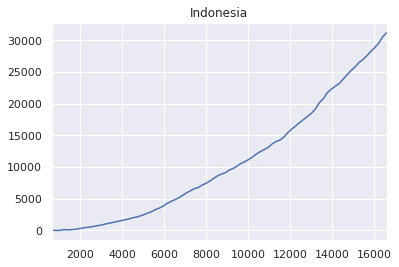

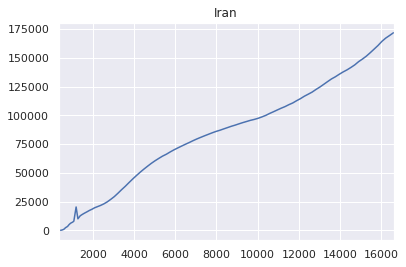

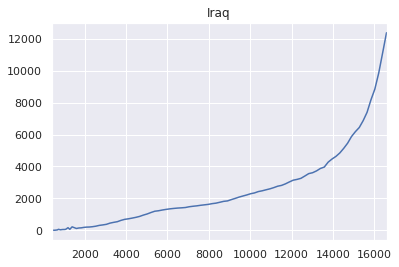

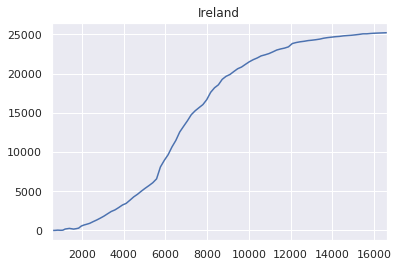

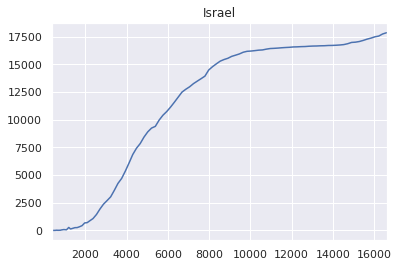

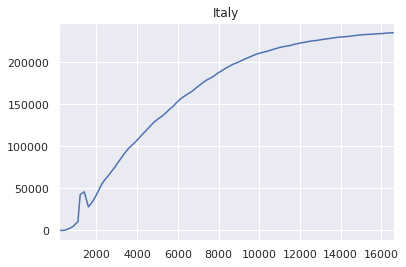

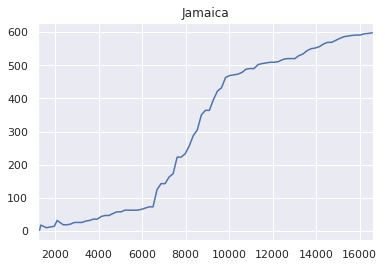

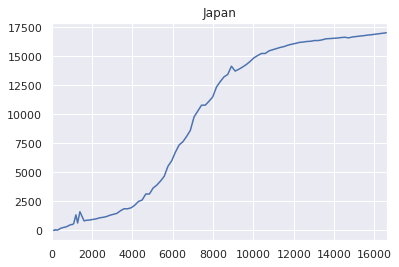

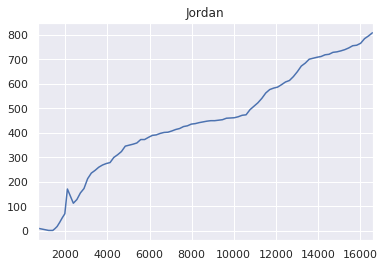

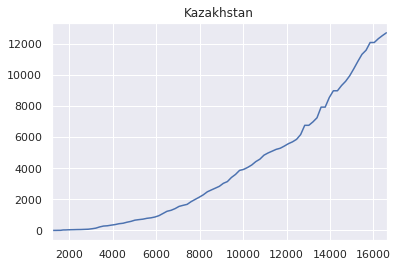

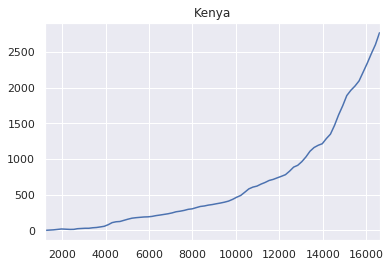

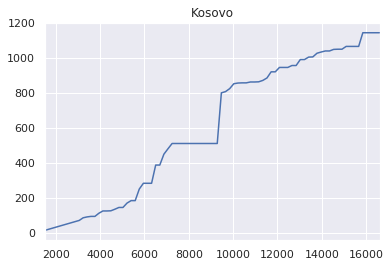

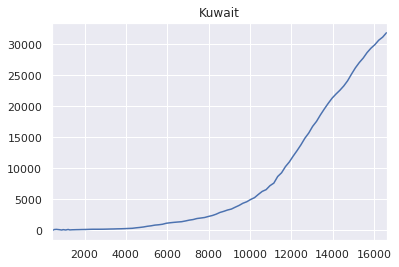

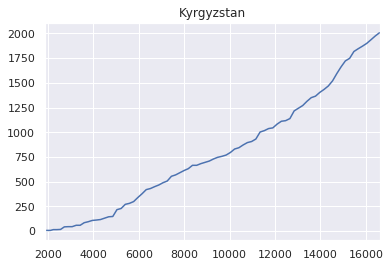

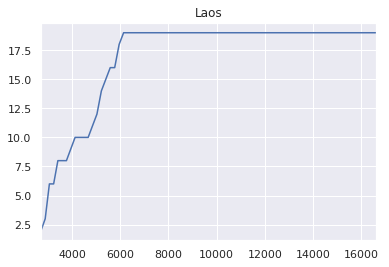

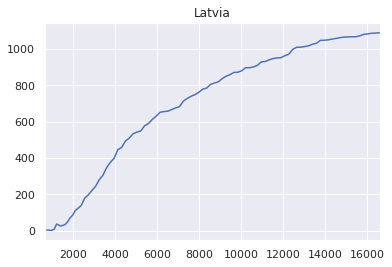

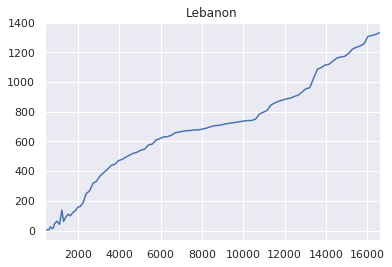

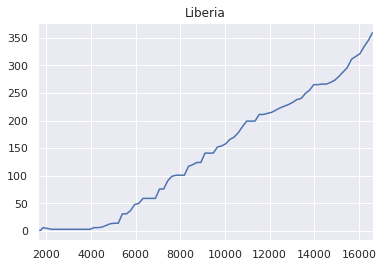

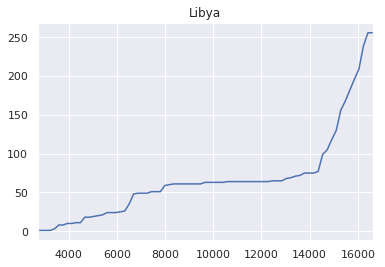

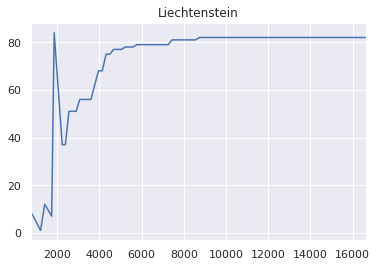

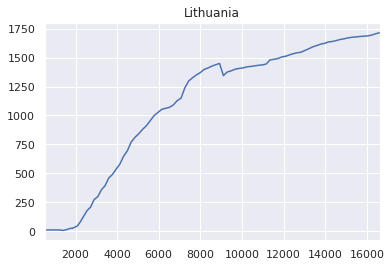

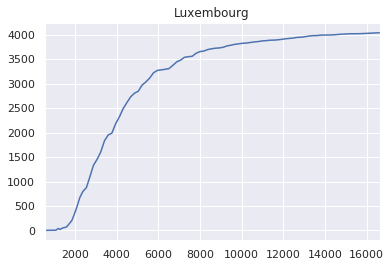

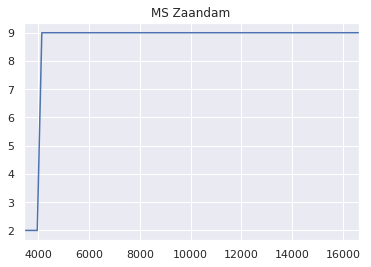

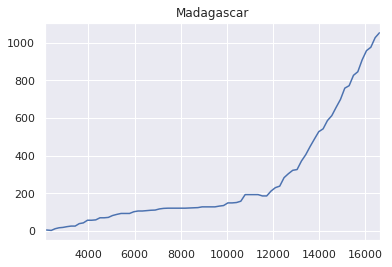

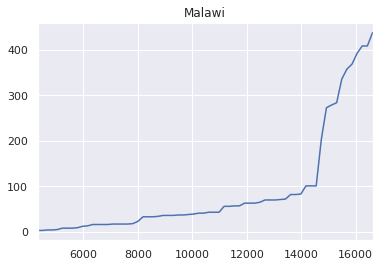

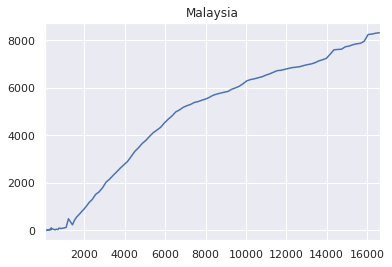

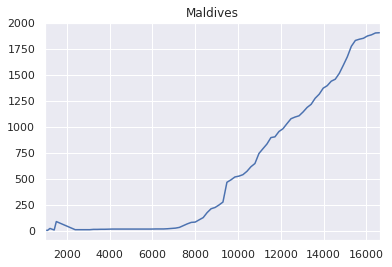

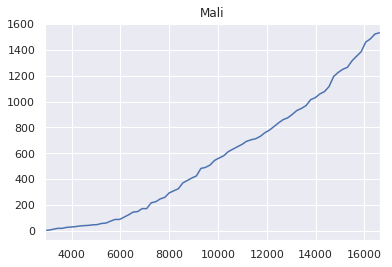

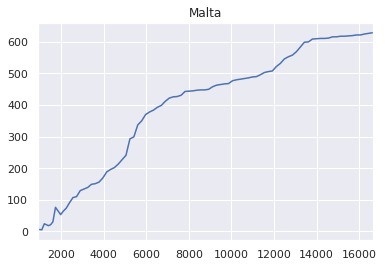

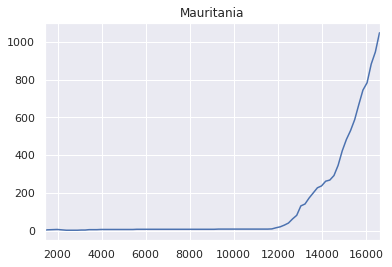

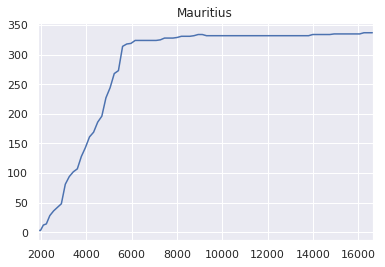

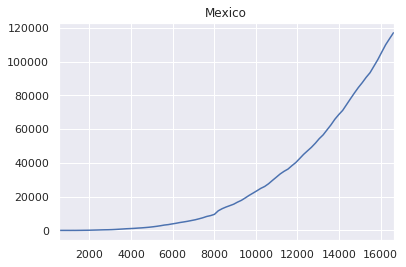

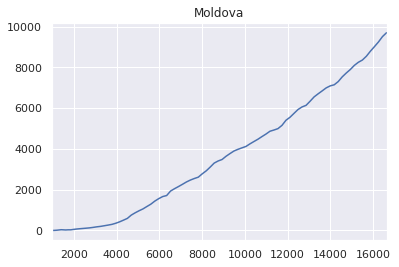

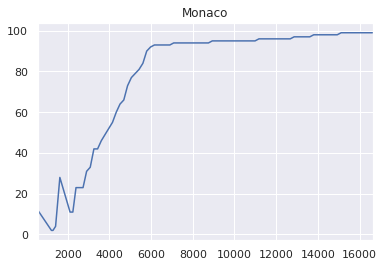

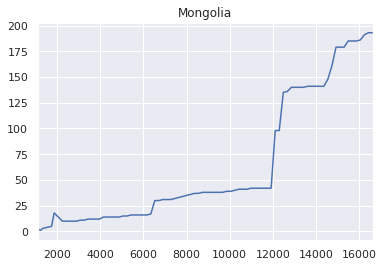

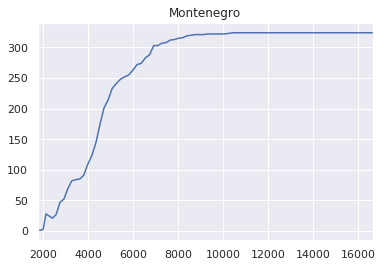

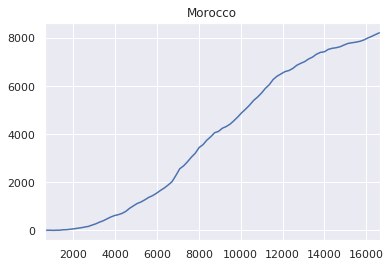

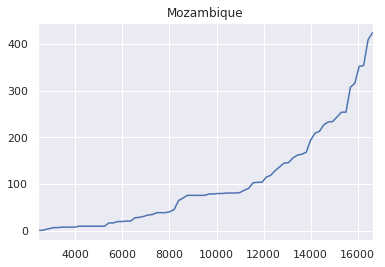

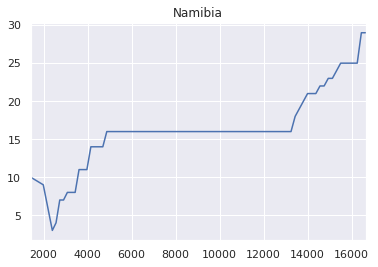

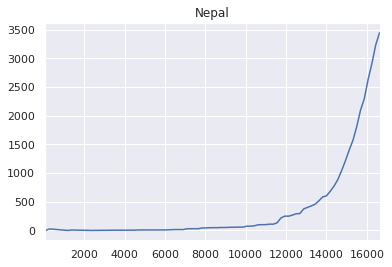

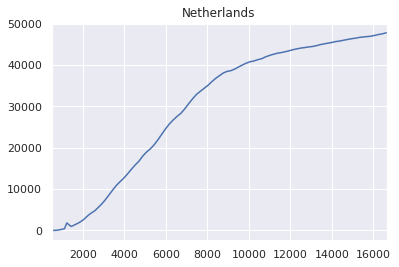

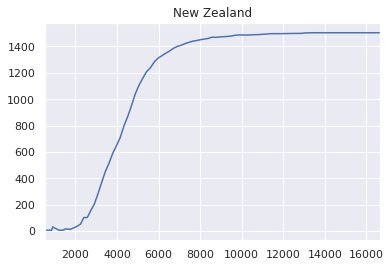

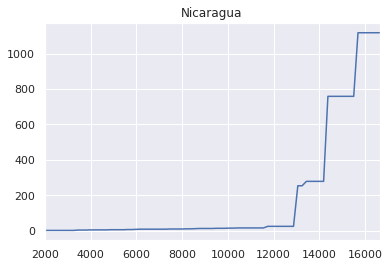

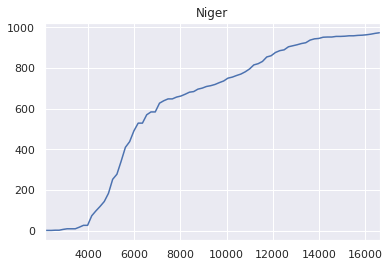

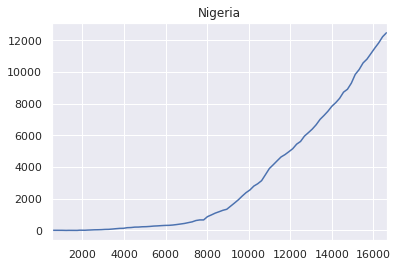

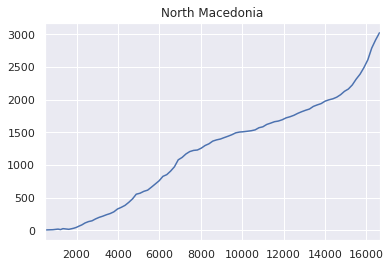

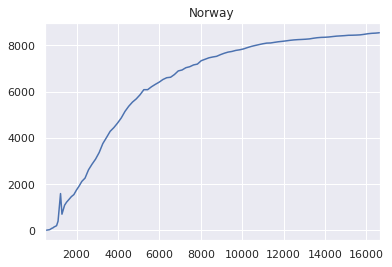

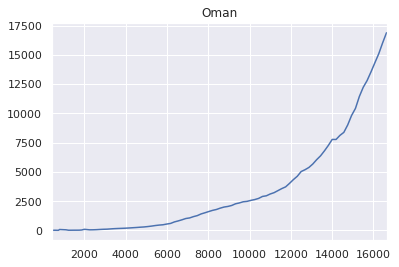

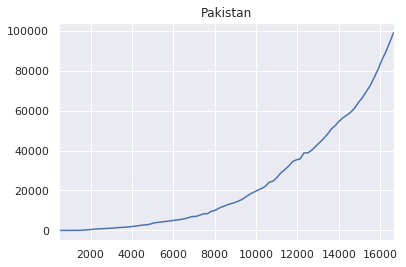

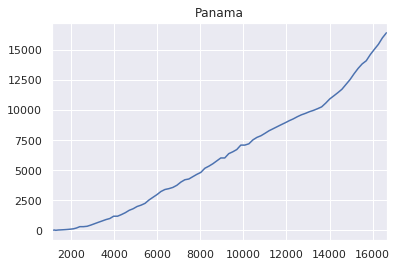

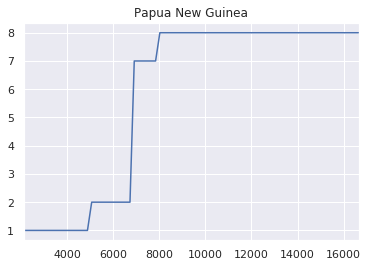

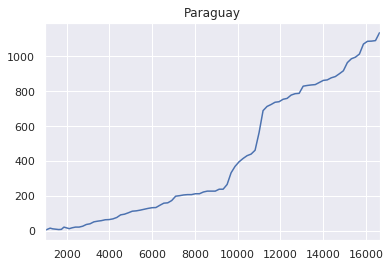

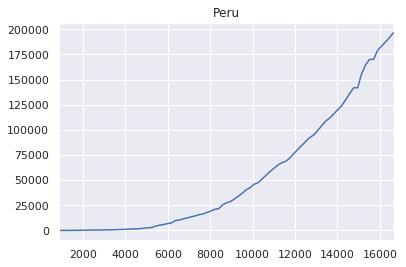

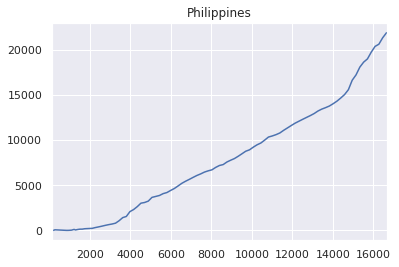

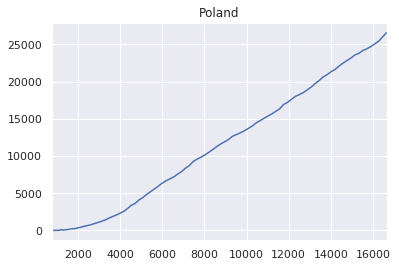

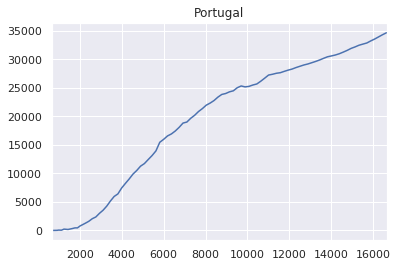

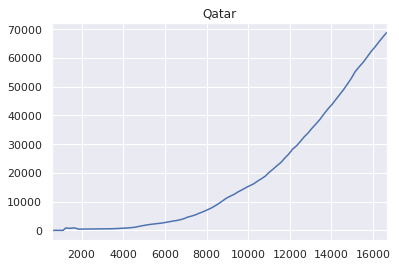

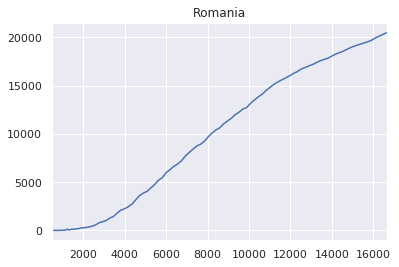

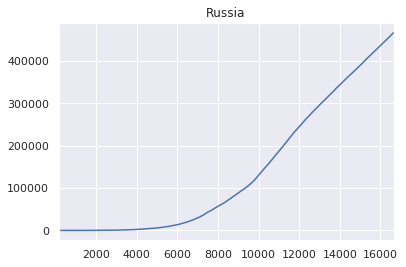

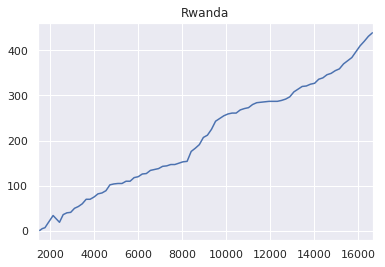

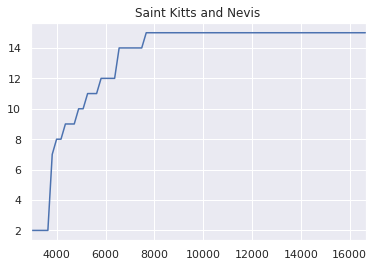

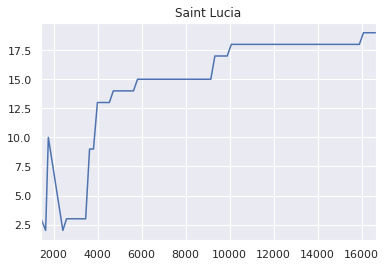

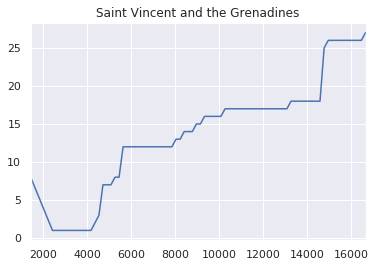

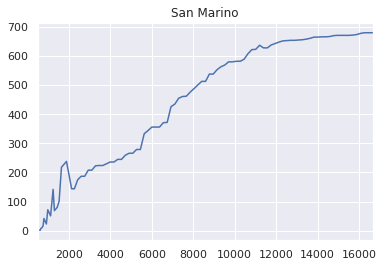

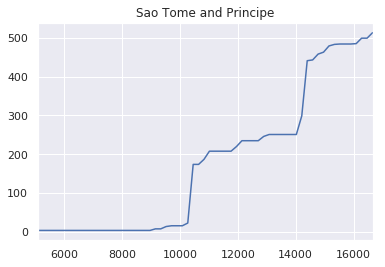

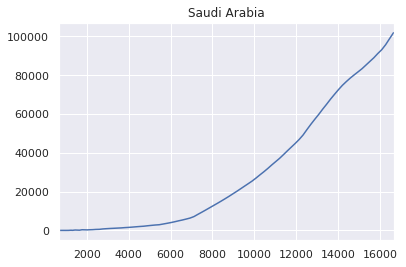

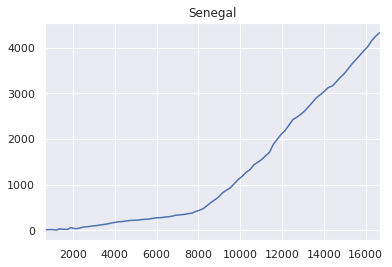

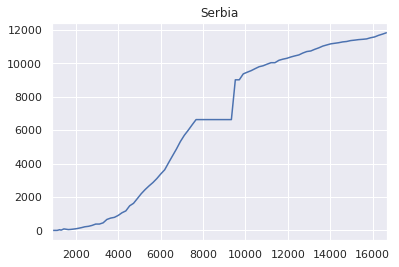

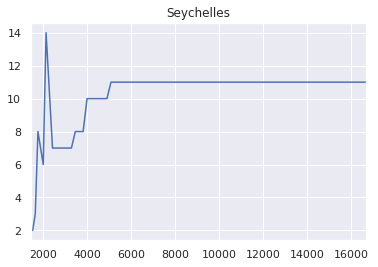

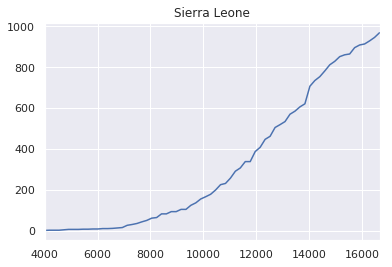

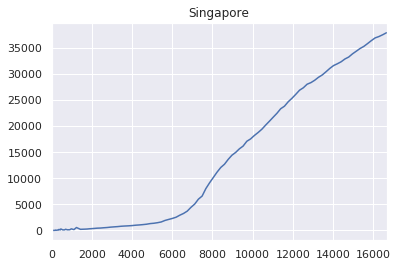

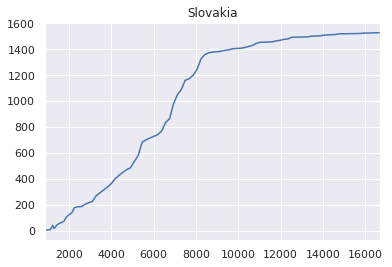

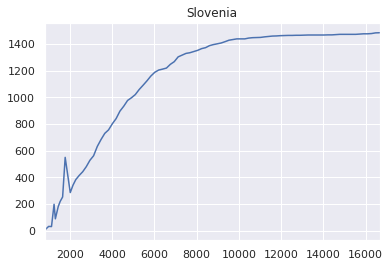

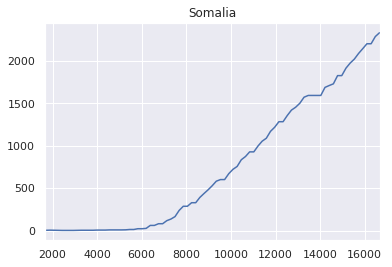

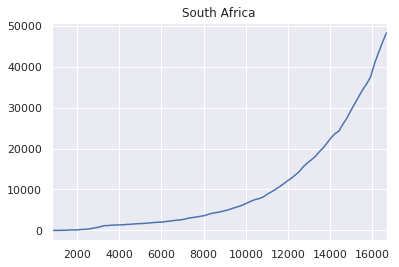

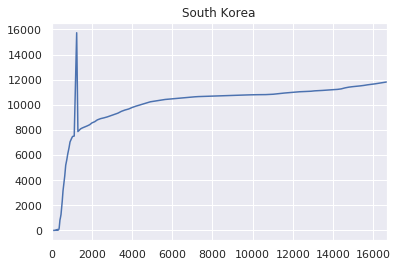

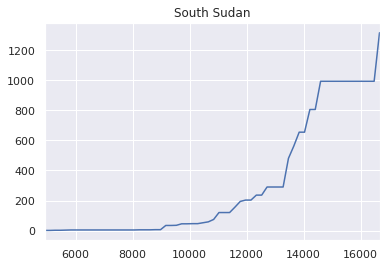

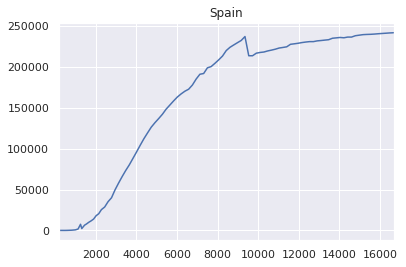

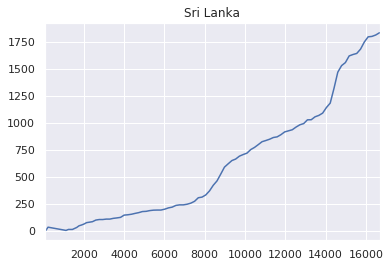

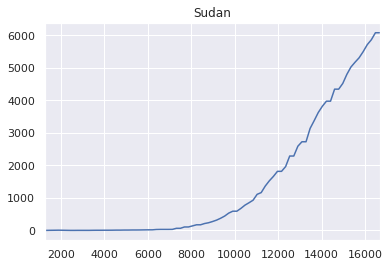

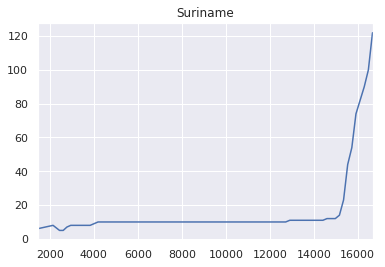

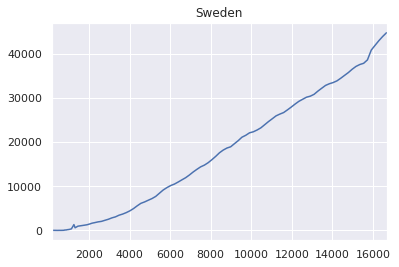

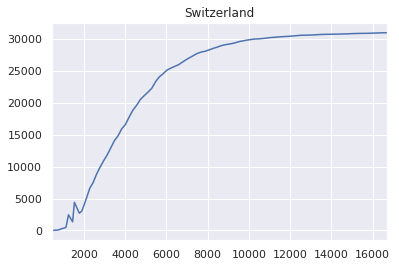

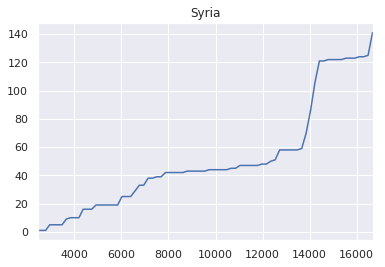

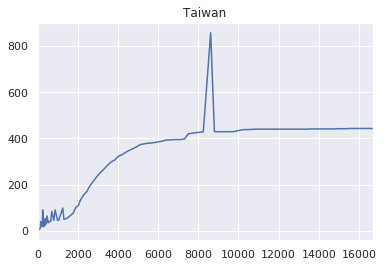

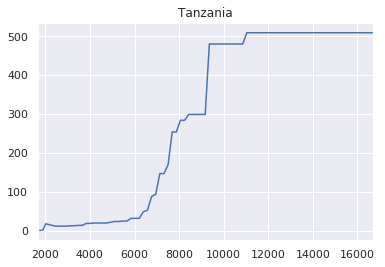

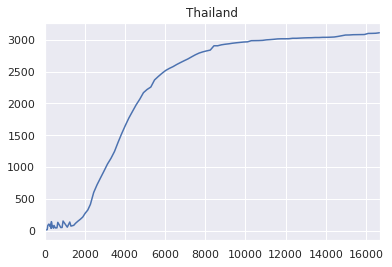

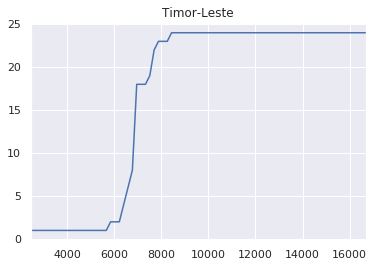

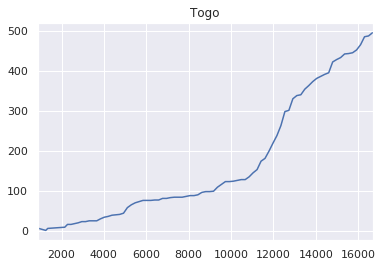

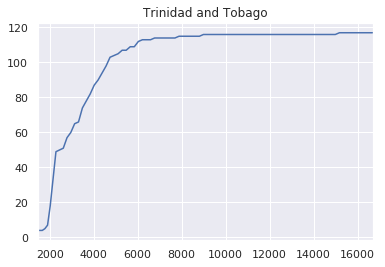

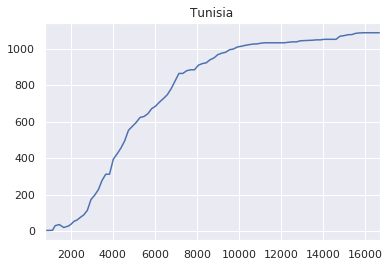

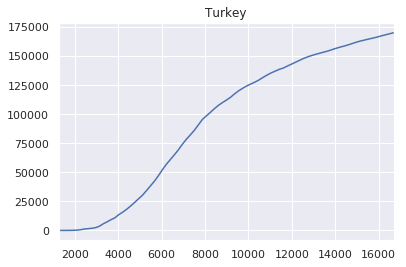

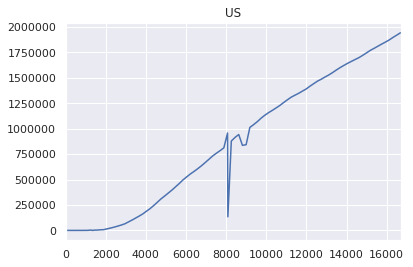

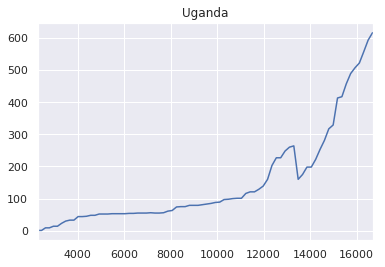

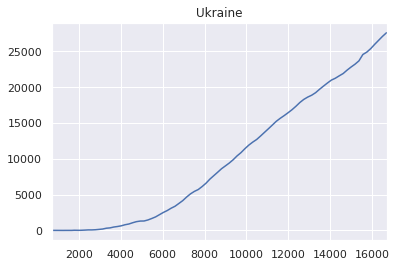

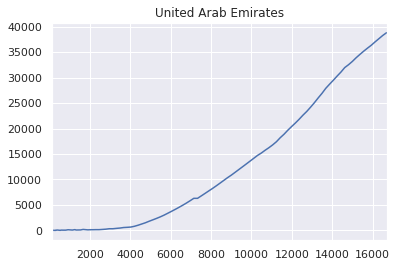

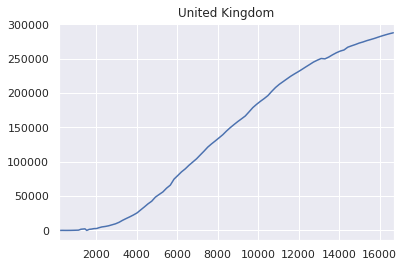

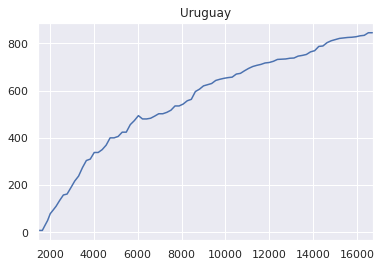

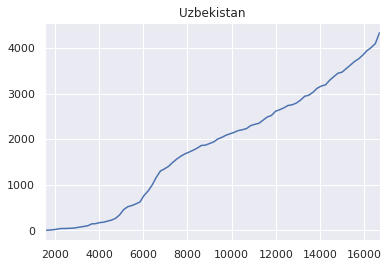

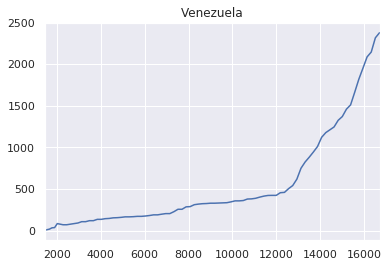

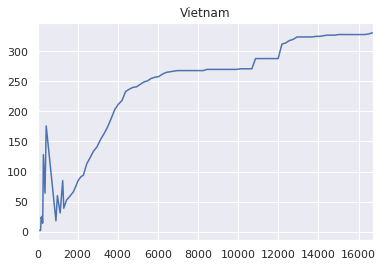

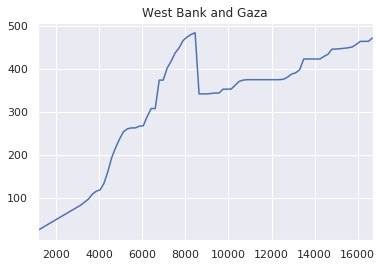

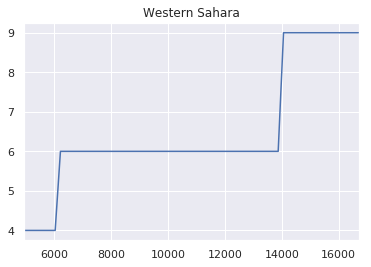

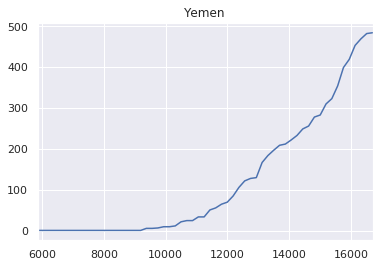

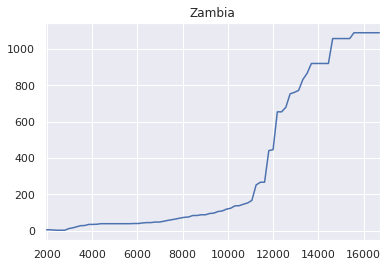

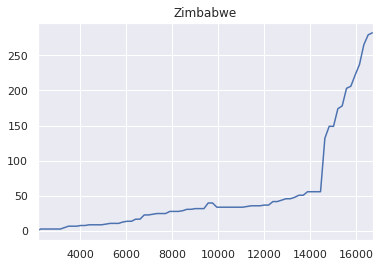

In [76]:
for country in countries_list:
    data[data.Country==country].Confirmed.plot()
    plt.title(country)
    plt.show()

In [77]:
len(data.Country.sort_values().unique())

184

## Daily cases

In [78]:
d = {}
for country in countries_list:
    d[country] = pd.DataFrame(data[data.Country == country])
    d[country].reset_index(drop=True, inplace=True)
    d[country]['Confirmed_daily'] = d[country].Confirmed.diff()
    d[country]['Confirmed_daily'][0] = d[country]['Confirmed'][0]
    d[country]['Deaths_daily'] = d[country].Deaths.diff()
    d[country]['Deaths_daily'][0] = d[country]['Deaths'][0]
    d[country]['Recovered_daily'] = d[country].Recovered.diff()
    d[country]['Recovered_daily'][0] = d[country]['Recovered'][0] 

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [79]:
d['Argentina'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-03,Argentina,1.0,0.0,0.0,93,1.0,0.0,0.0
1,2020-03-04,Argentina,2.0,0.0,0.0,93,1.0,0.0,0.0
2,2020-03-06,Argentina,2.0,0.0,0.0,93,0.0,0.0,0.0
3,2020-03-07,Argentina,8.0,0.0,0.0,93,6.0,0.0,0.0
4,2020-03-08,Argentina,24.0,2.0,0.0,93,16.0,2.0,0.0
5,2020-03-10,Argentina,17.0,1.0,0.0,93,-7.0,-1.0,0.0
6,2020-03-11,Argentina,69.0,4.0,0.0,93,52.0,3.0,0.0
7,2020-03-14,Argentina,34.0,2.0,1.0,93,-35.0,-2.0,1.0
8,2020-03-15,Argentina,45.0,2.0,1.0,93,11.0,0.0,0.0
9,2020-03-16,Argentina,56.0,2.0,1.0,93,11.0,0.0,0.0


In [80]:
for country in countries_list:
    if len(list(d[country][d[country].Confirmed_daily <0].index)) >0  :
        print(country, list(d[country][d[country].Confirmed_daily <0].index))

Afghanistan [1, 2, 4, 8, 9]
Albania [3]
Algeria [1, 5, 7, 8]
Andorra [1, 6]
Antigua and Barbuda [3]
Argentina [5, 7]
Armenia [1, 2]
Australia [8, 9, 11, 14, 16, 17, 19, 24, 25, 27, 30, 33, 35]
Austria [15]
Azerbaijan [4, 7, 10]
Bahrain [3, 7, 11, 14, 15]
Bangladesh [2]
Barbados [3]
Belarus [2, 5, 9]
Belgium [2, 13]
Benin [2, 60]
Bhutan [1, 3, 4]
Bolivia [4]
Bosnia and Herzegovina [2, 4]
Brazil [4, 8]
Brunei [3]
Burkina Faso [2, 4]
Cambodia [6]
Cameroon [2, 6]
Canada [8, 10, 11, 13, 16, 18, 21, 27, 29, 30, 34]
Central African Republic [3]
Chad [1]
Chile [4, 10]
China [37, 41, 42, 45, 47, 50, 51, 53, 54, 55, 57, 59, 62, 63, 65, 66, 68, 69, 70, 72, 73, 76, 77, 79, 80, 81, 82, 84, 85, 88, 89, 90, 92, 94, 95, 97, 134]
Colombia [4]
Congo (Brazzaville) [3]
Congo (Kinshasa) [2]
Costa Rica [5]
Cote d'Ivoire [1, 6]
Croatia [2, 5, 7, 9, 11]
Cuba [1, 3]
Cyprus [4, 8]
Czechia [1]
Denmark [3, 6, 10]
Djibouti [2]
Dominican Republic [4, 7]
Ecuador [1, 4, 8, 60, 61, 64]
Egypt [2, 4, 10]
Equatorial Guin

There are a lot of negative numbers which means that some reports are wrong. We have to go case by case to identify the problems. In general, the wrong entries are in the early stages.

In [81]:
# cleaning funtions
def clean_row(df, rows):
    for i in rows:
        df['Confirmed'][i] = df['Confirmed'][i-1]
        df['Deaths'][i] = df['Deaths'][i-1]
        df['Recovered'][i] = df['Recovered'][i-1]
    return df
def start_row(df, row):
    df = df[row:]
    df.reset_index(drop=True, inplace=True)
    df['Confirmed_daily'][0] = df['Confirmed'][0]
    df['Deaths_daily'][0] = df['Deaths'][0]
    df['Recovered_daily'][0] = df['Recovered'][0]
    return df

In [82]:
d['Afghanistan'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-24,Afghanistan,13.0,0.0,0.0,87,13.0,0.0,0.0
1,2020-03-08,Afghanistan,8.0,0.0,0.0,87,-5.0,0.0,0.0
2,2020-03-10,Afghanistan,5.0,0.0,0.0,87,-3.0,0.0,0.0
3,2020-03-11,Afghanistan,21.0,0.0,0.0,87,16.0,0.0,0.0
4,2020-03-14,Afghanistan,11.0,0.0,0.0,87,-10.0,0.0,0.0
5,2020-03-15,Afghanistan,16.0,0.0,0.0,87,5.0,0.0,0.0
6,2020-03-16,Afghanistan,21.0,0.0,1.0,87,5.0,0.0,1.0
7,2020-03-17,Afghanistan,66.0,0.0,3.0,87,45.0,0.0,2.0
8,2020-03-20,Afghanistan,48.0,0.0,2.0,87,-18.0,0.0,-1.0
9,2020-03-22,Afghanistan,40.0,1.0,1.0,87,-8.0,1.0,-1.0


It's not clear which entries are wrong here, I will keep only entries starting 2020-03-24

In [83]:
d['Afghanistan'] = start_row(d['Afghanistan'],11)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [84]:
d['Albania'].head(5)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-09,Albania,2.0,0.0,0.0,90,2.0,0.0,0.0
1,2020-03-10,Albania,10.0,0.0,0.0,90,8.0,0.0,0.0
2,2020-03-11,Albania,45.0,2.0,0.0,90,35.0,2.0,0.0
3,2020-03-12,Albania,23.0,1.0,0.0,90,-22.0,-1.0,0.0
4,2020-03-14,Albania,38.0,1.0,0.0,90,15.0,0.0,0.0


The 2020-03-11 entry is clearly wrong.

In [85]:
d['Albania'] = clean_row(d['Albania'],[2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
d['Algeria'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-25,Algeria,6.0,0.0,0.0,95,6.0,0.0,0.0
1,2020-03-02,Algeria,3.0,0.0,0.0,95,-3.0,0.0,0.0
2,2020-03-03,Algeria,5.0,0.0,0.0,95,2.0,0.0,0.0
3,2020-03-04,Algeria,24.0,0.0,0.0,95,19.0,0.0,0.0
4,2020-03-06,Algeria,34.0,0.0,0.0,95,10.0,0.0,0.0
5,2020-03-08,Algeria,19.0,0.0,0.0,95,-15.0,0.0,0.0
6,2020-03-09,Algeria,60.0,0.0,0.0,95,41.0,0.0,0.0
7,2020-03-11,Algeria,26.0,2.0,8.0,95,-34.0,2.0,8.0
8,2020-03-12,Algeria,24.0,1.0,8.0,95,-2.0,-1.0,0.0
9,2020-03-14,Algeria,37.0,3.0,12.0,95,13.0,2.0,4.0


I have to delete the first entries:

In [87]:
d['Algeria'] = start_row(d['Algeria'],8)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [88]:
d['Andorra'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-02,Andorra,10.0,0.0,0.0,87,10.0,0.0,0.0
1,2020-03-11,Andorra,1.0,0.0,0.0,87,-9.0,0.0,0.0
2,2020-03-12,Andorra,1.0,0.0,1.0,87,0.0,0.0,1.0
3,2020-03-13,Andorra,2.0,0.0,2.0,87,1.0,0.0,1.0
4,2020-03-16,Andorra,2.0,0.0,1.0,87,0.0,0.0,-1.0
5,2020-03-17,Andorra,78.0,0.0,2.0,87,76.0,0.0,1.0
6,2020-03-19,Andorra,53.0,0.0,1.0,87,-25.0,0.0,-1.0
7,2020-03-20,Andorra,75.0,0.0,1.0,87,22.0,0.0,0.0
8,2020-03-21,Andorra,88.0,0.0,1.0,87,13.0,0.0,0.0
9,2020-03-22,Andorra,113.0,1.0,1.0,87,25.0,1.0,0.0


In [89]:
d['Andorra'] = clean_row(d['Andorra'],[5])
d['Andorra'] = start_row(d['Andorra'],1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [90]:
d['Antigua and Barbuda'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Antigua and Barbuda,1.0,0.0,0.0,81,1.0,0.0,0.0
1,2020-03-13,Antigua and Barbuda,1.0,0.0,0.0,81,0.0,0.0,0.0
2,2020-03-15,Antigua and Barbuda,7.0,0.0,0.0,81,6.0,0.0,0.0
3,2020-03-22,Antigua and Barbuda,1.0,0.0,0.0,81,-6.0,0.0,0.0
4,2020-03-23,Antigua and Barbuda,3.0,0.0,0.0,81,2.0,0.0,0.0


In [91]:
d['Antigua and Barbuda']= clean_row(d['Antigua and Barbuda'],[2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
d['Argentina'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-03,Argentina,1.0,0.0,0.0,93,1.0,0.0,0.0
1,2020-03-04,Argentina,2.0,0.0,0.0,93,1.0,0.0,0.0
2,2020-03-06,Argentina,2.0,0.0,0.0,93,0.0,0.0,0.0
3,2020-03-07,Argentina,8.0,0.0,0.0,93,6.0,0.0,0.0
4,2020-03-08,Argentina,24.0,2.0,0.0,93,16.0,2.0,0.0
5,2020-03-10,Argentina,17.0,1.0,0.0,93,-7.0,-1.0,0.0
6,2020-03-11,Argentina,69.0,4.0,0.0,93,52.0,3.0,0.0
7,2020-03-14,Argentina,34.0,2.0,1.0,93,-35.0,-2.0,1.0
8,2020-03-15,Argentina,45.0,2.0,1.0,93,11.0,0.0,0.0
9,2020-03-16,Argentina,56.0,2.0,1.0,93,11.0,0.0,0.0


In [93]:
d['Argentina'] = clean_row(d['Argentina'],[4,6])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
d['Armenia'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-01,Armenia,11.0,0.0,0.0,89,11.0,0.0,0.0
1,2020-03-11,Armenia,8.0,0.0,0.0,89,-3.0,0.0,0.0
2,2020-03-12,Armenia,4.0,0.0,0.0,89,-4.0,0.0,0.0
3,2020-03-14,Armenia,18.0,0.0,0.0,89,14.0,0.0,0.0
4,2020-03-15,Armenia,26.0,0.0,0.0,89,8.0,0.0,0.0


In [95]:
d['Armenia'] = start_row(d['Armenia'],2)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [96]:
d['Australia'].head(35)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-25,Australia,4.0,0.0,0.0,116,4.0,0.0,0.0
1,2020-01-26,Australia,4.0,0.0,0.0,116,0.0,0.0,0.0
2,2020-01-27,Australia,5.0,0.0,0.0,116,1.0,0.0,0.0
3,2020-01-28,Australia,5.0,0.0,0.0,116,0.0,0.0,0.0
4,2020-01-29,Australia,5.0,0.0,0.0,116,0.0,0.0,0.0
5,2020-01-30,Australia,9.0,0.0,2.0,116,4.0,0.0,2.0
6,2020-01-31,Australia,9.0,0.0,2.0,116,0.0,0.0,0.0
7,2020-02-01,Australia,72.0,0.0,10.0,116,63.0,0.0,8.0
8,2020-02-02,Australia,34.0,0.0,0.0,116,-38.0,0.0,-10.0
9,2020-02-04,Australia,6.0,0.0,0.0,116,-28.0,0.0,0.0


In [97]:
d['Australia'].shape[0]

116

In [98]:
d['Australia'] = clean_row(d['Australia'],[33])
d['Australia'] = start_row(d['Australia'],31)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [99]:
d['Austria'][10:20]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
10,2020-03-07,Austria,79.0,0.0,0.0,102,24.0,0.0,0.0
11,2020-03-08,Austria,104.0,0.0,0.0,102,25.0,0.0,0.0
12,2020-03-09,Austria,131.0,0.0,2.0,102,27.0,0.0,2.0
13,2020-03-10,Austria,182.0,0.0,4.0,102,51.0,0.0,2.0
14,2020-03-11,Austria,750.0,1.0,10.0,102,568.0,1.0,6.0
15,2020-03-12,Austria,302.0,1.0,4.0,102,-448.0,0.0,-6.0
16,2020-03-14,Austria,655.0,1.0,6.0,102,353.0,0.0,2.0
17,2020-03-15,Austria,860.0,1.0,6.0,102,205.0,0.0,0.0
18,2020-03-16,Austria,1018.0,3.0,6.0,102,158.0,2.0,0.0
19,2020-03-17,Austria,1332.0,3.0,1.0,102,314.0,0.0,-5.0


In [100]:
d['Austria'] = clean_row(d['Austria'],[14])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
d['Azerbaijan'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-28,Azerbaijan,1.0,0.0,0.0,89,1.0,0.0,0.0
1,2020-03-01,Azerbaijan,12.0,0.0,0.0,89,11.0,0.0,0.0
2,2020-03-05,Azerbaijan,12.0,0.0,0.0,89,0.0,0.0,0.0
3,2020-03-07,Azerbaijan,27.0,0.0,0.0,89,15.0,0.0,0.0
4,2020-03-10,Azerbaijan,11.0,0.0,0.0,89,-16.0,0.0,0.0
5,2020-03-11,Azerbaijan,37.0,1.0,9.0,89,26.0,1.0,9.0
6,2020-03-13,Azerbaijan,38.0,2.0,9.0,89,1.0,1.0,0.0
7,2020-03-16,Azerbaijan,15.0,1.0,6.0,89,-23.0,-1.0,-3.0
8,2020-03-17,Azerbaijan,56.0,2.0,12.0,89,41.0,1.0,6.0
9,2020-03-19,Azerbaijan,88.0,2.0,12.0,89,32.0,0.0,0.0


In [102]:
d['Azerbaijan'] = start_row(d['Azerbaijan'],10)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [103]:
d['Bahrain'].head(20)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-24,Bahrain,1.0,0.0,0.0,99,1.0,0.0,0.0
1,2020-02-25,Bahrain,23.0,0.0,0.0,99,22.0,0.0,0.0
2,2020-02-26,Bahrain,66.0,0.0,0.0,99,43.0,0.0,0.0
3,2020-02-28,Bahrain,36.0,0.0,0.0,99,-30.0,0.0,0.0
4,2020-02-29,Bahrain,41.0,0.0,0.0,99,5.0,0.0,0.0
5,2020-03-01,Bahrain,47.0,0.0,0.0,99,6.0,0.0,0.0
6,2020-03-02,Bahrain,98.0,0.0,0.0,99,51.0,0.0,0.0
7,2020-03-04,Bahrain,52.0,0.0,0.0,99,-46.0,0.0,0.0
8,2020-03-05,Bahrain,55.0,0.0,0.0,99,3.0,0.0,0.0
9,2020-03-06,Bahrain,60.0,0.0,4.0,99,5.0,0.0,4.0


In [104]:
d['Bahrain'] = clean_row(d['Bahrain'], [2,6,10,13,14])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
d['Bangladesh'].head(8)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-08,Bangladesh,6.0,0.0,0.0,89,6.0,0.0,0.0
1,2020-03-10,Bangladesh,9.0,0.0,0.0,89,3.0,0.0,0.0
2,2020-03-11,Bangladesh,3.0,0.0,0.0,89,-6.0,0.0,0.0
3,2020-03-13,Bangladesh,3.0,0.0,0.0,89,0.0,0.0,0.0
4,2020-03-15,Bangladesh,5.0,0.0,0.0,89,2.0,0.0,0.0
5,2020-03-16,Bangladesh,8.0,0.0,2.0,89,3.0,0.0,2.0
6,2020-03-17,Bangladesh,10.0,0.0,3.0,89,2.0,0.0,1.0
7,2020-03-18,Bangladesh,14.0,1.0,3.0,89,4.0,1.0,0.0


In [106]:
d['Bangladesh'] = start_row(d['Bangladesh'],3)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [107]:
d['Barbados'].head(8)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-17,Barbados,2.0,0.0,0.0,82,2.0,0.0,0.0
1,2020-03-18,Barbados,2.0,0.0,0.0,82,0.0,0.0,0.0
2,2020-03-19,Barbados,10.0,0.0,0.0,82,8.0,0.0,0.0
3,2020-03-21,Barbados,6.0,0.0,0.0,82,-4.0,0.0,0.0
4,2020-03-22,Barbados,14.0,0.0,0.0,82,8.0,0.0,0.0
5,2020-03-23,Barbados,17.0,0.0,0.0,82,3.0,0.0,0.0
6,2020-03-24,Barbados,18.0,0.0,0.0,82,1.0,0.0,0.0
7,2020-03-25,Barbados,18.0,0.0,0.0,82,0.0,0.0,0.0


In [108]:
d['Barbados'] = clean_row(d['Barbados'],[2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
d['Belarus'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-28,Belarus,5.0,0.0,0.0,89,5.0,0.0,0.0
1,2020-03-04,Belarus,30.0,0.0,0.0,89,25.0,0.0,0.0
2,2020-03-09,Belarus,6.0,0.0,1.0,89,-24.0,0.0,1.0
3,2020-03-10,Belarus,18.0,0.0,6.0,89,12.0,0.0,5.0
4,2020-03-11,Belarus,27.0,0.0,3.0,89,9.0,0.0,-3.0
5,2020-03-12,Belarus,12.0,0.0,3.0,89,-15.0,0.0,0.0
6,2020-03-13,Belarus,54.0,0.0,6.0,89,42.0,0.0,3.0
7,2020-03-16,Belarus,72.0,0.0,6.0,89,18.0,0.0,0.0
8,2020-03-18,Belarus,102.0,0.0,10.0,89,30.0,0.0,4.0
9,2020-03-20,Belarus,69.0,0.0,5.0,89,-33.0,0.0,-5.0


In [110]:
d['Belarus'] = clean_row(d['Belarus'],[1,5,8,9])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
d['Belgium'].head(18)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-04,Belgium,13.0,0.0,0.0,99,13.0,0.0,0.0
1,2020-02-17,Belgium,13.0,0.0,13.0,99,0.0,0.0,13.0
2,2020-03-01,Belgium,2.0,0.0,1.0,99,-11.0,0.0,-12.0
3,2020-03-02,Belgium,8.0,0.0,1.0,99,6.0,0.0,0.0
4,2020-03-03,Belgium,13.0,0.0,1.0,99,5.0,0.0,0.0
5,2020-03-04,Belgium,23.0,0.0,1.0,99,10.0,0.0,0.0
6,2020-03-05,Belgium,50.0,0.0,1.0,99,27.0,0.0,0.0
7,2020-03-06,Belgium,109.0,0.0,1.0,99,59.0,0.0,0.0
8,2020-03-07,Belgium,169.0,0.0,1.0,99,60.0,0.0,0.0
9,2020-03-08,Belgium,200.0,0.0,1.0,99,31.0,0.0,0.0


In [112]:
d['Belgium'] = clean_row(d['Belgium'],[12])
d['Belgium'] = start_row(d['Belgium'],2)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [113]:
d['Benin'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-16,Benin,2.0,0.0,0.0,80,2.0,0.0,0.0
1,2020-03-18,Benin,8.0,0.0,0.0,80,6.0,0.0,0.0
2,2020-03-22,Benin,2.0,0.0,0.0,80,-6.0,0.0,0.0
3,2020-03-23,Benin,5.0,0.0,0.0,80,3.0,0.0,0.0
4,2020-03-24,Benin,6.0,0.0,0.0,80,1.0,0.0,0.0
5,2020-03-25,Benin,6.0,0.0,0.0,80,0.0,0.0,0.0
6,2020-03-26,Benin,6.0,0.0,0.0,80,0.0,0.0,0.0


In [114]:
d['Benin'] = clean_row(d['Benin'],[1])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
d['Bhutan'].head(8)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-06,Bhutan,7.0,0.0,0.0,82,7.0,0.0,0.0
1,2020-03-11,Bhutan,1.0,0.0,0.0,82,-6.0,0.0,0.0
2,2020-03-13,Bhutan,6.0,0.0,0.0,82,5.0,0.0,0.0
3,2020-03-20,Bhutan,4.0,0.0,0.0,82,-2.0,0.0,0.0
4,2020-03-22,Bhutan,2.0,0.0,0.0,82,-2.0,0.0,0.0
5,2020-03-23,Bhutan,2.0,0.0,0.0,82,0.0,0.0,0.0
6,2020-03-24,Bhutan,2.0,0.0,0.0,82,0.0,0.0,0.0
7,2020-03-25,Bhutan,2.0,0.0,0.0,82,0.0,0.0,0.0


In [116]:
d['Bhutan'] = start_row(d['Bhutan'],4)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [117]:
d['Bolivia'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Bolivia,7.0,0.0,0.0,84,7.0,0.0,0.0
1,2020-03-14,Bolivia,20.0,0.0,0.0,84,13.0,0.0,0.0
2,2020-03-16,Bolivia,22.0,0.0,0.0,84,2.0,0.0,0.0
3,2020-03-18,Bolivia,24.0,0.0,0.0,84,2.0,0.0,0.0
4,2020-03-20,Bolivia,15.0,0.0,0.0,84,-9.0,0.0,0.0
5,2020-03-21,Bolivia,19.0,0.0,0.0,84,4.0,0.0,0.0
6,2020-03-22,Bolivia,24.0,0.0,0.0,84,5.0,0.0,0.0


In [118]:
d['Bolivia'] = start_row(d['Bolivia'],4)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [119]:
d['Bosnia and Herzegovina'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-05,Bosnia and Herzegovina,4.0,0.0,0.0,91,4.0,0.0,0.0
1,2020-03-07,Bosnia and Herzegovina,9.0,0.0,0.0,91,5.0,0.0,0.0
2,2020-03-10,Bosnia and Herzegovina,5.0,0.0,0.0,91,-4.0,0.0,0.0
3,2020-03-11,Bosnia and Herzegovina,20.0,0.0,0.0,91,15.0,0.0,0.0
4,2020-03-12,Bosnia and Herzegovina,11.0,0.0,0.0,91,-9.0,0.0,0.0
5,2020-03-14,Bosnia and Herzegovina,18.0,0.0,0.0,91,7.0,0.0,0.0
6,2020-03-15,Bosnia and Herzegovina,24.0,0.0,0.0,91,6.0,0.0,0.0


In [120]:
d['Bosnia and Herzegovina'] = clean_row(d['Bosnia and Herzegovina'],[1,3])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
d['Brazil'].head(12)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-26,Brazil,3.0,0.0,0.0,95,3.0,0.0,0.0
1,2020-02-29,Brazil,8.0,0.0,0.0,95,5.0,0.0,0.0
2,2020-03-04,Brazil,8.0,0.0,0.0,95,0.0,0.0,0.0
3,2020-03-06,Brazil,26.0,0.0,0.0,95,18.0,0.0,0.0
4,2020-03-08,Brazil,20.0,0.0,0.0,95,-6.0,0.0,0.0
5,2020-03-09,Brazil,25.0,0.0,0.0,95,5.0,0.0,0.0
6,2020-03-10,Brazil,31.0,0.0,0.0,95,6.0,0.0,0.0
7,2020-03-11,Brazil,189.0,0.0,0.0,95,158.0,0.0,0.0
8,2020-03-12,Brazil,52.0,0.0,0.0,95,-137.0,0.0,0.0
9,2020-03-13,Brazil,151.0,0.0,0.0,95,99.0,0.0,0.0


In [122]:
d['Brazil'] = clean_row(d['Brazil'],[3,7])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
d['Brunei'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-09,Brunei,1.0,0.0,0.0,89,1.0,0.0,0.0
1,2020-03-10,Brunei,1.0,0.0,0.0,89,0.0,0.0,0.0
2,2020-03-11,Brunei,59.0,0.0,0.0,89,58.0,0.0,0.0
3,2020-03-14,Brunei,40.0,0.0,0.0,89,-19.0,0.0,0.0
4,2020-03-15,Brunei,50.0,0.0,0.0,89,10.0,0.0,0.0
5,2020-03-16,Brunei,54.0,0.0,0.0,89,4.0,0.0,0.0
6,2020-03-17,Brunei,56.0,0.0,0.0,89,2.0,0.0,0.0


In [124]:
d['Brunei'] = clean_row(d['Brunei'],[2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [125]:
d['Burkina Faso'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-10,Burkina Faso,1.0,0.0,0.0,86,1.0,0.0,0.0
1,2020-03-11,Burkina Faso,6.0,0.0,0.0,86,5.0,0.0,0.0
2,2020-03-13,Burkina Faso,5.0,0.0,0.0,86,-1.0,0.0,0.0
3,2020-03-16,Burkina Faso,30.0,0.0,0.0,86,25.0,0.0,0.0
4,2020-03-18,Burkina Faso,20.0,1.0,0.0,86,-10.0,1.0,0.0
5,2020-03-19,Burkina Faso,33.0,1.0,0.0,86,13.0,0.0,0.0
6,2020-03-20,Burkina Faso,40.0,1.0,0.0,86,7.0,0.0,0.0


In [126]:
d['Burkina Faso'] = clean_row(d['Burkina Faso'],[1,3])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [127]:
d['Cambodia'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-27,Cambodia,1.0,0.0,0.0,92,1.0,0.0,0.0
1,2020-01-28,Cambodia,1.0,0.0,0.0,92,0.0,0.0,0.0
2,2020-01-29,Cambodia,1.0,0.0,0.0,92,0.0,0.0,0.0
3,2020-01-30,Cambodia,1.0,0.0,0.0,92,0.0,0.0,0.0
4,2020-01-31,Cambodia,12.0,0.0,0.0,92,11.0,0.0,0.0
5,2020-02-12,Cambodia,25.0,0.0,25.0,92,13.0,0.0,25.0
6,2020-03-08,Cambodia,6.0,0.0,3.0,92,-19.0,0.0,-22.0
7,2020-03-11,Cambodia,11.0,0.0,3.0,92,5.0,0.0,0.0
8,2020-03-14,Cambodia,21.0,0.0,3.0,92,10.0,0.0,0.0
9,2020-03-17,Cambodia,33.0,0.0,1.0,92,12.0,0.0,-2.0


In [128]:
d['Cambodia'] = clean_row(d['Cambodia'],[5,6,7,8])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
d['Cameroon'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-06,Cameroon,2.0,0.0,0.0,87,2.0,0.0,0.0
1,2020-03-08,Cameroon,10.0,0.0,0.0,87,8.0,0.0,0.0
2,2020-03-11,Cameroon,2.0,0.0,0.0,87,-8.0,0.0,0.0
3,2020-03-13,Cameroon,4.0,0.0,0.0,87,2.0,0.0,0.0
4,2020-03-16,Cameroon,4.0,0.0,0.0,87,0.0,0.0,0.0
5,2020-03-17,Cameroon,20.0,0.0,0.0,87,16.0,0.0,0.0
6,2020-03-19,Cameroon,13.0,0.0,0.0,87,-7.0,0.0,0.0
7,2020-03-20,Cameroon,20.0,0.0,0.0,87,7.0,0.0,0.0
8,2020-03-21,Cameroon,27.0,0.0,0.0,87,7.0,0.0,0.0
9,2020-03-22,Cameroon,40.0,0.0,2.0,87,13.0,0.0,2.0


In [130]:
d['Cameroon'] = clean_row(d['Cameroon'],[1,5])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
d['Canada'].head(54)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-26,Canada,1.0,0.0,0.0,117,1.0,0.0,0.0
1,2020-01-27,Canada,1.0,0.0,0.0,117,0.0,0.0,0.0
2,2020-01-28,Canada,2.0,0.0,0.0,117,1.0,0.0,0.0
3,2020-01-29,Canada,2.0,0.0,0.0,117,0.0,0.0,0.0
4,2020-01-30,Canada,3.0,0.0,0.0,117,1.0,0.0,0.0
5,2020-01-31,Canada,3.0,0.0,0.0,117,0.0,0.0,0.0
6,2020-02-01,Canada,13.0,0.0,0.0,117,10.0,0.0,0.0
7,2020-02-04,Canada,42.0,0.0,0.0,117,29.0,0.0,0.0
8,2020-02-05,Canada,4.0,0.0,0.0,117,-38.0,0.0,0.0
9,2020-02-07,Canada,40.0,0.0,0.0,117,36.0,0.0,0.0


In [132]:
d['Canada'] = clean_row(d['Canada'],[48])
d['Canada'] = start_row(d['Canada'],41)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [133]:
d['Central African Republic'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-15,Central African Republic,1.0,0.0,0.0,81,1.0,0.0,0.0
1,2020-03-16,Central African Republic,4.0,0.0,0.0,81,3.0,0.0,0.0
2,2020-03-20,Central African Republic,6.0,0.0,0.0,81,2.0,0.0,0.0
3,2020-03-22,Central African Republic,3.0,0.0,0.0,81,-3.0,0.0,0.0
4,2020-03-23,Central African Republic,3.0,0.0,0.0,81,0.0,0.0,0.0
5,2020-03-24,Central African Republic,3.0,0.0,0.0,81,0.0,0.0,0.0
6,2020-03-25,Central African Republic,3.0,0.0,0.0,81,0.0,0.0,0.0
7,2020-03-26,Central African Republic,3.0,0.0,0.0,81,0.0,0.0,0.0
8,2020-03-27,Central African Republic,3.0,0.0,0.0,81,0.0,0.0,0.0
9,2020-03-28,Central African Republic,3.0,0.0,0.0,81,0.0,0.0,0.0


In [134]:
d['Central African Republic'] = start_row(d['Central African Republic'],3)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [135]:
d['Chad'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-19,Chad,2.0,0.0,0.0,80,2.0,0.0,0.0
1,2020-03-21,Chad,1.0,0.0,0.0,80,-1.0,0.0,0.0
2,2020-03-22,Chad,1.0,0.0,0.0,80,0.0,0.0,0.0
3,2020-03-23,Chad,1.0,0.0,0.0,80,0.0,0.0,0.0
4,2020-03-24,Chad,3.0,0.0,0.0,80,2.0,0.0,0.0


In [136]:
d['Chad'] = start_row(d['Chad'],1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [137]:
d['Chile'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-03,Chile,1.0,0.0,0.0,90,1.0,0.0,0.0
1,2020-03-04,Chile,1.0,0.0,0.0,90,0.0,0.0,0.0
2,2020-03-05,Chile,12.0,0.0,0.0,90,11.0,0.0,0.0
3,2020-03-08,Chile,16.0,0.0,0.0,90,4.0,0.0,0.0
4,2020-03-10,Chile,13.0,0.0,0.0,90,-3.0,0.0,0.0
5,2020-03-11,Chile,89.0,0.0,0.0,90,76.0,0.0,0.0
6,2020-03-14,Chile,135.0,0.0,0.0,90,46.0,0.0,0.0
7,2020-03-16,Chile,155.0,0.0,0.0,90,20.0,0.0,0.0
8,2020-03-17,Chile,201.0,0.0,0.0,90,46.0,0.0,0.0
9,2020-03-18,Chile,476.0,0.0,0.0,90,275.0,0.0,0.0


In [138]:
d['Chile'] = clean_row(d['Chile'],[3,9])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
d['China'][70:99]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
70,2020-04-01,China,74562.0,3256.0,68535.0,139,-3581.0,18.0,-3541.0
71,2020-04-02,China,99533.0,3384.0,93689.0,139,24971.0,128.0,25154.0
72,2020-04-03,China,77177.0,3272.0,71511.0,139,-22356.0,-112.0,-22178.0
73,2020-04-04,China,76202.0,3279.0,70708.0,139,-975.0,7.0,-803.0
74,2020-04-05,China,79385.0,3275.0,73998.0,139,3183.0,-4.0,3290.0
75,2020-04-06,China,84323.0,3417.0,78964.0,139,4938.0,142.0,4966.0
76,2020-04-07,China,77852.0,3295.0,72597.0,139,-6471.0,-122.0,-6367.0
77,2020-04-08,China,75876.0,3273.0,70613.0,139,-1976.0,-22.0,-1984.0
78,2020-04-09,China,94121.0,3409.0,88870.0,139,18245.0,136.0,18257.0
79,2020-04-10,China,91122.0,3283.0,86158.0,139,-2999.0,-126.0,-2712.0


In [140]:
#d['China'] = clean_row(d['China'],[,90,92,93,95,96,97])

In [141]:
d['Colombia'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-06,Colombia,1.0,0.0,0.0,90,1.0,0.0,0.0
1,2020-03-07,Colombia,3.0,0.0,0.0,90,2.0,0.0,0.0
2,2020-03-10,Colombia,3.0,0.0,0.0,90,0.0,0.0,0.0
3,2020-03-11,Colombia,31.0,0.0,0.0,90,28.0,0.0,0.0
4,2020-03-14,Colombia,22.0,0.0,0.0,90,-9.0,0.0,0.0
5,2020-03-15,Colombia,34.0,0.0,0.0,90,12.0,0.0,0.0
6,2020-03-16,Colombia,54.0,0.0,0.0,90,20.0,0.0,0.0


In [142]:
d['Colombia'] = clean_row(d['Colombia'],[3])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
d['Congo (Brazzaville)'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-15,Congo (Brazzaville),1.0,0.0,0.0,81,1.0,0.0,0.0
1,2020-03-16,Congo (Brazzaville),3.0,0.0,0.0,81,2.0,0.0,0.0
2,2020-03-19,Congo (Brazzaville),9.0,0.0,0.0,81,6.0,0.0,0.0
3,2020-03-22,Congo (Brazzaville),3.0,0.0,0.0,81,-6.0,0.0,0.0
4,2020-03-23,Congo (Brazzaville),4.0,0.0,0.0,81,1.0,0.0,0.0


In [144]:
d['Congo (Brazzaville)'] = clean_row(d['Congo (Brazzaville)'],[2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
d['Congo (Kinshasa)'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Congo (Kinshasa),4.0,0.0,0.0,85,4.0,0.0,0.0
1,2020-03-13,Congo (Kinshasa),6.0,0.0,0.0,85,2.0,0.0,0.0
2,2020-03-17,Congo (Kinshasa),3.0,0.0,0.0,85,-3.0,0.0,0.0
3,2020-03-18,Congo (Kinshasa),4.0,0.0,0.0,85,1.0,0.0,0.0
4,2020-03-19,Congo (Kinshasa),14.0,0.0,0.0,85,10.0,0.0,0.0


In [146]:
d['Congo (Kinshasa)'] = start_row(d['Congo (Kinshasa)'],2)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [147]:
d['Costa Rica'].head(8)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-06,Costa Rica,1.0,0.0,0.0,92,1.0,0.0,0.0
1,2020-03-07,Costa Rica,1.0,0.0,0.0,92,0.0,0.0,0.0
2,2020-03-08,Costa Rica,5.0,0.0,0.0,92,4.0,0.0,0.0
3,2020-03-09,Costa Rica,18.0,0.0,0.0,92,13.0,0.0,0.0
4,2020-03-11,Costa Rica,36.0,0.0,0.0,92,18.0,0.0,0.0
5,2020-03-12,Costa Rica,22.0,0.0,0.0,92,-14.0,0.0,0.0
6,2020-03-14,Costa Rica,26.0,0.0,0.0,92,4.0,0.0,0.0
7,2020-03-15,Costa Rica,27.0,0.0,0.0,92,1.0,0.0,0.0


In [148]:
d['Costa Rica'] = clean_row(d['Costa Rica'],[4])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [149]:
d['Cote d\'Ivoire'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Cote d'Ivoire,2.0,0.0,0.0,85,2.0,0.0,0.0
1,2020-03-12,Cote d'Ivoire,1.0,0.0,0.0,85,-1.0,0.0,0.0
2,2020-03-13,Cote d'Ivoire,3.0,0.0,0.0,85,2.0,0.0,0.0
3,2020-03-17,Cote d'Ivoire,5.0,0.0,1.0,85,2.0,0.0,1.0
4,2020-03-18,Cote d'Ivoire,6.0,0.0,1.0,85,1.0,0.0,0.0
5,2020-03-19,Cote d'Ivoire,18.0,0.0,2.0,85,12.0,0.0,1.0
6,2020-03-21,Cote d'Ivoire,14.0,0.0,1.0,85,-4.0,0.0,-1.0
7,2020-03-22,Cote d'Ivoire,14.0,0.0,1.0,85,0.0,0.0,0.0
8,2020-03-23,Cote d'Ivoire,25.0,0.0,2.0,85,11.0,0.0,1.0
9,2020-03-24,Cote d'Ivoire,73.0,0.0,2.0,85,48.0,0.0,0.0


In [150]:
d['Cote d\'Ivoiree'] = clean_row(d['Cote d\'Ivoire'],[1,5])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
d['Croatia'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-25,Croatia,1.0,0.0,0.0,97,1.0,0.0,0.0
1,2020-02-26,Croatia,6.0,0.0,0.0,97,5.0,0.0,0.0
2,2020-02-28,Croatia,5.0,0.0,0.0,97,-1.0,0.0,0.0
3,2020-02-29,Croatia,6.0,0.0,0.0,97,1.0,0.0,0.0
4,2020-03-01,Croatia,14.0,0.0,0.0,97,8.0,0.0,0.0
5,2020-03-03,Croatia,9.0,0.0,0.0,97,-5.0,0.0,0.0
6,2020-03-04,Croatia,20.0,0.0,0.0,97,11.0,0.0,0.0
7,2020-03-06,Croatia,11.0,0.0,0.0,97,-9.0,0.0,0.0
8,2020-03-07,Croatia,36.0,0.0,0.0,97,25.0,0.0,0.0
9,2020-03-10,Croatia,14.0,0.0,0.0,97,-22.0,0.0,0.0


In [152]:
d['Croatia'] = clean_row(d['Croatia'],[4,6,8,10])
d['Croatia'] = start_row(d['Croatia'],2)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [153]:
d['Cuba'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Cuba,4.0,0.0,0.0,86,4.0,0.0,0.0
1,2020-03-12,Cuba,3.0,0.0,0.0,86,-1.0,0.0,0.0
2,2020-03-13,Cuba,12.0,0.0,0.0,86,9.0,0.0,0.0
3,2020-03-17,Cuba,5.0,0.0,0.0,86,-7.0,0.0,0.0
4,2020-03-18,Cuba,7.0,1.0,0.0,86,2.0,1.0,0.0


In [154]:
d['Cuba'] = clean_row(d['Cuba'],[2])
d['Cuba'] = start_row(d['Cuba'], 1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [155]:
d['Cyprus'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-09,Cyprus,2.0,0.0,0.0,87,2.0,0.0,0.0
1,2020-03-10,Cyprus,3.0,0.0,0.0,87,1.0,0.0,0.0
2,2020-03-11,Cyprus,26.0,0.0,0.0,87,23.0,0.0,0.0
3,2020-03-14,Cyprus,52.0,0.0,0.0,87,26.0,0.0,0.0
4,2020-03-16,Cyprus,33.0,0.0,0.0,87,-19.0,0.0,0.0
5,2020-03-17,Cyprus,46.0,0.0,0.0,87,13.0,0.0,0.0
6,2020-03-18,Cyprus,49.0,0.0,0.0,87,3.0,0.0,0.0
7,2020-03-19,Cyprus,134.0,0.0,0.0,87,85.0,0.0,0.0
8,2020-03-21,Cyprus,84.0,0.0,0.0,87,-50.0,0.0,0.0
9,2020-03-22,Cyprus,95.0,1.0,3.0,87,11.0,1.0,3.0


In [156]:
d['Cyprus'] = clean_row(d['Cyprus'],[3,7])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
d['Czechia'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Czechia,232.0,0.0,0.0,88,232.0,0.0,0.0
1,2020-03-12,Czechia,94.0,0.0,0.0,88,-138.0,0.0,0.0
2,2020-03-14,Czechia,189.0,0.0,0.0,88,95.0,0.0,0.0
3,2020-03-15,Czechia,253.0,0.0,0.0,88,64.0,0.0,0.0
4,2020-03-16,Czechia,298.0,0.0,3.0,88,45.0,0.0,3.0


In [158]:
d['Czechia'] = start_row(d['Czechia'],1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [159]:
d['Denmark'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-27,Denmark,2.0,0.0,0.0,97,2.0,0.0,0.0
1,2020-02-29,Denmark,3.0,0.0,0.0,97,1.0,0.0,0.0
2,2020-03-01,Denmark,8.0,0.0,0.0,97,5.0,0.0,0.0
3,2020-03-03,Denmark,6.0,0.0,0.0,97,-2.0,0.0,0.0
4,2020-03-04,Denmark,20.0,0.0,0.0,97,14.0,0.0,0.0
5,2020-03-06,Denmark,46.0,0.0,2.0,97,26.0,0.0,2.0
6,2020-03-08,Denmark,35.0,0.0,1.0,97,-11.0,0.0,-1.0
7,2020-03-09,Denmark,90.0,0.0,1.0,97,55.0,0.0,0.0
8,2020-03-10,Denmark,262.0,0.0,1.0,97,172.0,0.0,0.0
9,2020-03-11,Denmark,1250.0,0.0,2.0,97,988.0,0.0,1.0


In [160]:
d['Denmark'] = clean_row(d['Denmark'],[2,5,9])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [161]:
d['Djibouti'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-18,Djibouti,1.0,0.0,0.0,80,1.0,0.0,0.0
1,2020-03-19,Djibouti,3.0,0.0,0.0,80,2.0,0.0,0.0
2,2020-03-22,Djibouti,1.0,0.0,0.0,80,-2.0,0.0,0.0
3,2020-03-23,Djibouti,3.0,0.0,0.0,80,2.0,0.0,0.0
4,2020-03-24,Djibouti,3.0,0.0,0.0,80,0.0,0.0,0.0
5,2020-03-25,Djibouti,11.0,0.0,0.0,80,8.0,0.0,0.0
6,2020-03-26,Djibouti,11.0,0.0,0.0,80,0.0,0.0,0.0


In [162]:
d['Djibouti'] = clean_row(d['Djibouti'],[1])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
d['Dominican Republic'].head(12)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-01,Dominican Republic,1.0,0.0,0.0,88,1.0,0.0,0.0
1,2020-03-02,Dominican Republic,4.0,0.0,0.0,88,3.0,0.0,0.0
2,2020-03-06,Dominican Republic,4.0,0.0,0.0,88,0.0,0.0,0.0
3,2020-03-08,Dominican Republic,25.0,0.0,0.0,88,21.0,0.0,0.0
4,2020-03-11,Dominican Republic,5.0,0.0,0.0,88,-20.0,0.0,0.0
5,2020-03-14,Dominican Republic,33.0,0.0,0.0,88,28.0,0.0,0.0
6,2020-03-17,Dominican Republic,42.0,2.0,0.0,88,9.0,2.0,0.0
7,2020-03-19,Dominican Republic,34.0,2.0,0.0,88,-8.0,0.0,0.0
8,2020-03-20,Dominican Republic,72.0,2.0,0.0,88,38.0,0.0,0.0
9,2020-03-21,Dominican Republic,112.0,2.0,0.0,88,40.0,0.0,0.0


In [164]:
d['Dominican Republic'] = clean_row(d['Dominican Republic'],[4,7])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [165]:
d['Ecuador'][53:75]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
53,2020-05-01,Ecuador,24934.0,900.0,1558.0,92,259.0,17.0,1.0
54,2020-05-02,Ecuador,26336.0,1063.0,1913.0,92,1402.0,163.0,355.0
55,2020-05-03,Ecuador,27464.0,1371.0,2132.0,92,1128.0,308.0,219.0
56,2020-05-04,Ecuador,29538.0,1564.0,3300.0,92,2074.0,193.0,1168.0
57,2020-05-05,Ecuador,31881.0,1569.0,3433.0,92,2343.0,5.0,133.0
58,2020-05-06,Ecuador,31881.0,1569.0,3433.0,92,0.0,0.0,0.0
59,2020-05-07,Ecuador,31881.0,1618.0,3433.0,92,0.0,49.0,0.0
60,2020-05-08,Ecuador,30298.0,1654.0,3433.0,92,-1583.0,36.0,0.0
61,2020-05-09,Ecuador,28818.0,1704.0,3433.0,92,-1480.0,50.0,0.0
62,2020-05-10,Ecuador,29071.0,1717.0,3433.0,92,253.0,13.0,0.0


In [166]:
d['Ecuador'] = clean_row(d['Ecuador'],[3,7,8,56,57,58,59,60,63])
d['Ecuador'] = start_row(d['Ecuador'],1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [167]:
d['Egypt'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-14,Egypt,7.0,0.0,0.0,97,7.0,0.0,0.0
1,2020-02-21,Egypt,7.0,0.0,0.0,97,0.0,0.0,0.0
2,2020-02-28,Egypt,2.0,0.0,2.0,97,-5.0,0.0,2.0
3,2020-03-01,Egypt,8.0,0.0,4.0,97,6.0,0.0,2.0
4,2020-03-05,Egypt,3.0,0.0,1.0,97,-5.0,0.0,-3.0
5,2020-03-06,Egypt,30.0,0.0,2.0,97,27.0,0.0,1.0
6,2020-03-08,Egypt,49.0,1.0,1.0,97,19.0,1.0,-1.0
7,2020-03-09,Egypt,55.0,1.0,12.0,97,6.0,0.0,11.0
8,2020-03-10,Egypt,59.0,1.0,1.0,97,4.0,0.0,-11.0
9,2020-03-11,Egypt,140.0,3.0,54.0,97,81.0,2.0,53.0


In [168]:
d['Egypt'] = clean_row(d['Egypt'],[8,9])
d['Egypt'] = start_row(d['Egypt'],6)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [169]:
d['Equatorial Guinea'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-15,Equatorial Guinea,3.0,0.0,0.0,81,3.0,0.0,0.0
1,2020-03-18,Equatorial Guinea,4.0,0.0,0.0,81,1.0,0.0,0.0
2,2020-03-19,Equatorial Guinea,18.0,0.0,0.0,81,14.0,0.0,0.0
3,2020-03-22,Equatorial Guinea,6.0,0.0,0.0,81,-12.0,0.0,0.0
4,2020-03-23,Equatorial Guinea,9.0,0.0,0.0,81,3.0,0.0,0.0
5,2020-03-24,Equatorial Guinea,9.0,0.0,0.0,81,0.0,0.0,0.0
6,2020-03-25,Equatorial Guinea,9.0,0.0,0.0,81,0.0,0.0,0.0


In [170]:
d['Equatorial Guinea'] = clean_row(d['Equatorial Guinea'],[1,2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [171]:
d['Estonia'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-27,Estonia,5.0,0.0,0.0,92,5.0,0.0,0.0
1,2020-03-03,Estonia,4.0,0.0,0.0,92,-1.0,0.0,0.0
2,2020-03-05,Estonia,3.0,0.0,0.0,92,-1.0,0.0,0.0
3,2020-03-06,Estonia,40.0,0.0,0.0,92,37.0,0.0,0.0
4,2020-03-10,Estonia,12.0,0.0,0.0,92,-28.0,0.0,0.0
5,2020-03-11,Estonia,111.0,0.0,0.0,92,99.0,0.0,0.0
6,2020-03-14,Estonia,115.0,0.0,0.0,92,4.0,0.0,0.0


In [172]:
d['Estonia'] = start_row(d['Estonia'],5)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [173]:
d['Eswatini'].head(6)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-14,Eswatini,1.0,0.0,0.0,80,1.0,0.0,0.0
1,2020-03-15,Eswatini,7.0,0.0,0.0,80,6.0,0.0,0.0
2,2020-03-22,Eswatini,4.0,0.0,0.0,80,-3.0,0.0,0.0
3,2020-03-23,Eswatini,4.0,0.0,0.0,80,0.0,0.0,0.0
4,2020-03-24,Eswatini,4.0,0.0,0.0,80,0.0,0.0,0.0
5,2020-03-25,Eswatini,4.0,0.0,0.0,80,0.0,0.0,0.0


In [174]:
d['Eswatini'] = start_row(d['Eswatini'],2)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [175]:
d['Ethiopia'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Ethiopia,1.0,0.0,0.0,83,1.0,0.0,0.0
1,2020-03-13,Ethiopia,2.0,0.0,0.0,83,1.0,0.0,0.0
2,2020-03-16,Ethiopia,10.0,0.0,0.0,83,8.0,0.0,0.0
3,2020-03-18,Ethiopia,12.0,0.0,0.0,83,2.0,0.0,0.0
4,2020-03-20,Ethiopia,18.0,0.0,0.0,83,6.0,0.0,0.0
5,2020-03-22,Ethiopia,11.0,0.0,0.0,83,-7.0,0.0,0.0
6,2020-03-23,Ethiopia,11.0,0.0,0.0,83,0.0,0.0,0.0
7,2020-03-24,Ethiopia,12.0,0.0,0.0,83,1.0,0.0,0.0
8,2020-03-25,Ethiopia,12.0,0.0,0.0,83,0.0,0.0,0.0
9,2020-03-26,Ethiopia,12.0,0.0,0.0,83,0.0,0.0,0.0


In [176]:
d['Fiji'].head(5)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-19,Fiji,3.0,0.0,0.0,79,3.0,0.0,0.0
1,2020-03-22,Fiji,2.0,0.0,0.0,79,-1.0,0.0,0.0
2,2020-03-23,Fiji,3.0,0.0,0.0,79,1.0,0.0,0.0
3,2020-03-24,Fiji,4.0,0.0,0.0,79,1.0,0.0,0.0
4,2020-03-25,Fiji,5.0,0.0,0.0,79,1.0,0.0,0.0


In [177]:
d['Fiji'] = start_row(d['Fiji'],1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [178]:
d['Finland'].head(20)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-29,Finland,1.0,0.0,0.0,99,1.0,0.0,0.0
1,2020-01-30,Finland,1.0,0.0,0.0,99,0.0,0.0,0.0
2,2020-01-31,Finland,12.0,0.0,0.0,99,11.0,0.0,0.0
3,2020-02-12,Finland,14.0,0.0,14.0,99,2.0,0.0,14.0
4,2020-02-26,Finland,6.0,0.0,3.0,99,-8.0,0.0,-11.0
5,2020-02-29,Finland,3.0,0.0,1.0,99,-3.0,0.0,-2.0
6,2020-03-01,Finland,24.0,0.0,4.0,99,21.0,0.0,3.0
7,2020-03-05,Finland,12.0,0.0,1.0,99,-12.0,0.0,-3.0
8,2020-03-06,Finland,30.0,0.0,2.0,99,18.0,0.0,1.0
9,2020-03-08,Finland,23.0,0.0,1.0,99,-7.0,0.0,-1.0


In [179]:
d['Finland'] = clean_row(d['Finland'],[8,12])
d['Finland'] = start_row(d['Finland'],7)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [180]:
d['France'][:18]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-24,France,2.0,0.0,0.0,114,2.0,0.0,0.0
1,2020-01-25,France,3.0,0.0,0.0,114,1.0,0.0,0.0
2,2020-01-26,France,3.0,0.0,0.0,114,0.0,0.0,0.0
3,2020-01-27,France,3.0,0.0,0.0,114,0.0,0.0,0.0
4,2020-01-28,France,4.0,0.0,0.0,114,1.0,0.0,0.0
5,2020-01-29,France,5.0,0.0,0.0,114,1.0,0.0,0.0
6,2020-01-30,France,5.0,0.0,0.0,114,0.0,0.0,0.0
7,2020-01-31,France,5.0,0.0,0.0,114,0.0,0.0,0.0
8,2020-02-01,France,42.0,0.0,0.0,114,37.0,0.0,0.0
9,2020-02-08,France,44.0,0.0,0.0,114,2.0,0.0,0.0


In [181]:
d['France'] =  clean_row(d['France'],[27,59,60,66,73,88])
d['France'] = start_row(d['France'],12)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [182]:
d['Gabon'].head()

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-14,Gabon,6.0,0.0,0.0,81,6.0,0.0,0.0
1,2020-03-20,Gabon,3.0,1.0,0.0,81,-3.0,1.0,0.0
2,2020-03-21,Gabon,4.0,1.0,0.0,81,1.0,0.0,0.0
3,2020-03-22,Gabon,5.0,1.0,0.0,81,1.0,0.0,0.0
4,2020-03-23,Gabon,5.0,1.0,0.0,81,0.0,0.0,0.0


In [183]:
d['Gabon'] = start_row(d['Gabon'],1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [184]:
d['Georgia'].head(12)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-26,Georgia,1.0,0.0,0.0,92,1.0,0.0,0.0
1,2020-02-27,Georgia,3.0,0.0,0.0,92,2.0,0.0,0.0
2,2020-03-01,Georgia,12.0,0.0,0.0,92,9.0,0.0,0.0
3,2020-03-05,Georgia,12.0,0.0,0.0,92,0.0,0.0,0.0
4,2020-03-08,Georgia,13.0,0.0,0.0,92,1.0,0.0,0.0
5,2020-03-09,Georgia,30.0,0.0,0.0,92,17.0,0.0,0.0
6,2020-03-11,Georgia,73.0,0.0,0.0,92,43.0,0.0,0.0
7,2020-03-14,Georgia,63.0,0.0,0.0,92,-10.0,0.0,0.0
8,2020-03-16,Georgia,33.0,0.0,1.0,92,-30.0,0.0,1.0
9,2020-03-17,Georgia,34.0,0.0,1.0,92,1.0,0.0,0.0


In [185]:
d['Georgia'] = clean_row(d['Georgia'],[6,7])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [186]:
d['Germany'][:20]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-28,Germany,4.0,0.0,0.0,116,4.0,0.0,0.0
1,2020-01-29,Germany,4.0,0.0,0.0,116,0.0,0.0,0.0
2,2020-01-30,Germany,4.0,0.0,0.0,116,0.0,0.0,0.0
3,2020-01-31,Germany,5.0,0.0,0.0,116,1.0,0.0,0.0
4,2020-02-01,Germany,8.0,0.0,0.0,116,3.0,0.0,0.0
5,2020-02-02,Germany,10.0,0.0,0.0,116,2.0,0.0,0.0
6,2020-02-03,Germany,48.0,0.0,0.0,116,38.0,0.0,0.0
7,2020-02-07,Germany,26.0,0.0,0.0,116,-22.0,0.0,0.0
8,2020-02-09,Germany,28.0,0.0,0.0,116,2.0,0.0,0.0
9,2020-02-11,Germany,32.0,0.0,0.0,116,4.0,0.0,0.0


In [187]:
d['Germany'] = clean_row(d['Germany'],[28])
d['Germany'] = start_row(d['Germany'],13)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [188]:
d['Ghana'].head(8)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-14,Ghana,3.0,0.0,0.0,84,3.0,0.0,0.0
1,2020-03-15,Ghana,12.0,0.0,0.0,84,9.0,0.0,0.0
2,2020-03-17,Ghana,14.0,0.0,0.0,84,2.0,0.0,0.0
3,2020-03-19,Ghana,11.0,0.0,0.0,84,-3.0,0.0,0.0
4,2020-03-20,Ghana,16.0,0.0,0.0,84,5.0,0.0,0.0
5,2020-03-21,Ghana,19.0,1.0,0.0,84,3.0,1.0,0.0
6,2020-03-22,Ghana,23.0,1.0,0.0,84,4.0,0.0,0.0
7,2020-03-23,Ghana,27.0,2.0,0.0,84,4.0,1.0,0.0


In [189]:
d['Ghana'] = clean_row(d['Ghana'],[3])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [190]:
d['Greece'].head(17)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-26,Greece,1.0,0.0,0.0,97,1.0,0.0,0.0
1,2020-02-27,Greece,3.0,0.0,0.0,97,2.0,0.0,0.0
2,2020-02-28,Greece,8.0,0.0,0.0,97,5.0,0.0,0.0
3,2020-03-01,Greece,21.0,0.0,0.0,97,13.0,0.0,0.0
4,2020-03-04,Greece,9.0,0.0,0.0,97,-12.0,0.0,0.0
5,2020-03-05,Greece,31.0,0.0,0.0,97,22.0,0.0,0.0
6,2020-03-06,Greece,45.0,0.0,0.0,97,14.0,0.0,0.0
7,2020-03-07,Greece,46.0,0.0,0.0,97,1.0,0.0,0.0
8,2020-03-08,Greece,146.0,0.0,0.0,97,100.0,0.0,0.0
9,2020-03-10,Greece,89.0,0.0,0.0,97,-57.0,0.0,0.0


In [191]:
d['Greece'] = clean_row(d['Greece'],[3,9,10])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
d['Guatemala'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-14,Guatemala,2.0,0.0,0.0,84,2.0,0.0,0.0
1,2020-03-16,Guatemala,2.0,1.0,0.0,84,0.0,1.0,0.0
2,2020-03-17,Guatemala,12.0,2.0,0.0,84,10.0,1.0,0.0
3,2020-03-19,Guatemala,9.0,1.0,0.0,84,-3.0,-1.0,0.0
4,2020-03-20,Guatemala,12.0,1.0,0.0,84,3.0,0.0,0.0
5,2020-03-21,Guatemala,17.0,1.0,0.0,84,5.0,0.0,0.0
6,2020-03-22,Guatemala,19.0,1.0,0.0,84,2.0,0.0,0.0


In [193]:
d['Guatemala'] = clean_row(d['Guatemala'],[2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
d['Guinea'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Guinea,1.0,0.0,0.0,82,1.0,0.0,0.0
1,2020-03-13,Guinea,1.0,0.0,0.0,82,0.0,0.0,0.0
2,2020-03-15,Guinea,6.0,0.0,0.0,82,5.0,0.0,0.0
3,2020-03-21,Guinea,2.0,0.0,0.0,82,-4.0,0.0,0.0
4,2020-03-22,Guinea,2.0,0.0,0.0,82,0.0,0.0,0.0
5,2020-03-23,Guinea,4.0,0.0,0.0,82,2.0,0.0,0.0
6,2020-03-24,Guinea,4.0,0.0,0.0,82,0.0,0.0,0.0


In [195]:
d['Guinea'] = clean_row(d['Guinea'],[2])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [196]:
d['Guyana'].head(12)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Guyana,1.0,1.0,0.0,83,1.0,1.0,0.0
1,2020-03-12,Guyana,1.0,1.0,0.0,83,0.0,0.0,0.0
2,2020-03-14,Guyana,1.0,1.0,0.0,83,0.0,0.0,0.0
3,2020-03-15,Guyana,8.0,2.0,0.0,83,7.0,1.0,0.0
4,2020-03-17,Guyana,35.0,5.0,0.0,83,27.0,3.0,0.0
5,2020-03-22,Guyana,18.0,1.0,0.0,83,-17.0,-4.0,0.0
6,2020-03-23,Guyana,20.0,1.0,0.0,83,2.0,0.0,0.0
7,2020-03-24,Guyana,5.0,1.0,0.0,83,-15.0,0.0,0.0
8,2020-03-25,Guyana,5.0,1.0,0.0,83,0.0,0.0,0.0
9,2020-03-26,Guyana,5.0,1.0,0.0,83,0.0,0.0,0.0


In [197]:
d['Guyana'] = start_row(d['Guyana'],7)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [198]:
d['Holy See'].head(7)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-10,Holy See,3.0,0.0,0.0,81,3.0,0.0,0.0
1,2020-03-11,Holy See,1.0,0.0,0.0,81,-2.0,0.0,0.0
2,2020-03-13,Holy See,8.0,0.0,0.0,81,7.0,0.0,0.0
3,2020-03-22,Holy See,1.0,0.0,0.0,81,-7.0,0.0,0.0
4,2020-03-23,Holy See,1.0,0.0,0.0,81,0.0,0.0,0.0
5,2020-03-24,Holy See,4.0,0.0,0.0,81,3.0,0.0,0.0
6,2020-03-25,Holy See,4.0,0.0,0.0,81,0.0,0.0,0.0


In [199]:
d['Holy See'] = start_row(d['Holy See'],3)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [200]:
d['Honduras'][53:65]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
53,2020-05-07,Honduras,1461.0,99.0,132.0,86,191.0,6.0,10.0
54,2020-05-08,Honduras,1685.0,105.0,154.0,86,224.0,6.0,22.0
55,2020-05-09,Honduras,1771.0,107.0,192.0,86,86.0,2.0,38.0
56,2020-05-10,Honduras,1830.0,108.0,195.0,86,59.0,1.0,3.0
57,2020-05-11,Honduras,1972.0,108.0,203.0,86,142.0,0.0,8.0
58,2020-05-12,Honduras,2100.0,116.0,206.0,86,128.0,8.0,3.0
59,2020-05-13,Honduras,2080.0,121.0,211.0,86,-20.0,5.0,5.0
60,2020-05-14,Honduras,2255.0,123.0,237.0,86,175.0,2.0,26.0
61,2020-05-15,Honduras,2318.0,133.0,253.0,86,63.0,10.0,16.0
62,2020-05-16,Honduras,2460.0,134.0,264.0,86,142.0,1.0,11.0


In [201]:
d['Honduras'] = start_row(d['Honduras'],1)
d['Honduras'] = clean_row(d['Honduras'],[7,59])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [202]:
d['Hungary'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-04,Hungary,2.0,0.0,0.0,92,2.0,0.0,0.0
1,2020-03-05,Hungary,4.0,0.0,0.0,92,2.0,0.0,0.0
2,2020-03-07,Hungary,4.0,0.0,0.0,92,0.0,0.0,0.0
3,2020-03-08,Hungary,7.0,0.0,0.0,92,3.0,0.0,0.0
4,2020-03-09,Hungary,18.0,0.0,0.0,92,11.0,0.0,0.0
5,2020-03-11,Hungary,45.0,0.0,0.0,92,27.0,0.0,0.0
6,2020-03-14,Hungary,30.0,0.0,1.0,92,-15.0,0.0,1.0
7,2020-03-15,Hungary,32.0,1.0,1.0,92,2.0,1.0,0.0
8,2020-03-16,Hungary,39.0,1.0,1.0,92,7.0,0.0,0.0
9,2020-03-17,Hungary,50.0,1.0,2.0,92,11.0,0.0,1.0


In [203]:
d['Hungary'] = clean_row(d['Hungary'],[5])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [204]:
d['Iceland'].head(17)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-28,Iceland,1.0,0.0,0.0,99,1.0,0.0,0.0
1,2020-02-29,Iceland,1.0,0.0,0.0,99,0.0,0.0,0.0
2,2020-03-01,Iceland,3.0,0.0,0.0,99,2.0,0.0,0.0
3,2020-03-02,Iceland,6.0,0.0,0.0,99,3.0,0.0,0.0
4,2020-03-03,Iceland,11.0,0.0,0.0,99,5.0,0.0,0.0
5,2020-03-04,Iceland,26.0,0.0,0.0,99,15.0,0.0,0.0
6,2020-03-05,Iceland,34.0,0.0,0.0,99,8.0,0.0,0.0
7,2020-03-06,Iceland,43.0,0.0,0.0,99,9.0,0.0,0.0
8,2020-03-07,Iceland,100.0,0.0,0.0,99,57.0,0.0,0.0
9,2020-03-09,Iceland,58.0,0.0,0.0,99,-42.0,0.0,0.0


In [205]:
d['Iceland'] = clean_row(d['Iceland'],[8,11])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [206]:
d['India'].head(18)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-30,India,1.0,0.0,0.0,102,1.0,0.0,0.0
1,2020-01-31,India,2.0,0.0,0.0,102,1.0,0.0,0.0
2,2020-02-02,India,2.0,0.0,0.0,102,0.0,0.0,0.0
3,2020-02-03,India,30.0,0.0,0.0,102,28.0,0.0,0.0
4,2020-02-13,India,9.0,0.0,0.0,102,-21.0,0.0,0.0
5,2020-02-16,India,45.0,0.0,45.0,102,36.0,0.0,45.0
6,2020-03-02,India,10.0,0.0,6.0,102,-35.0,0.0,-39.0
7,2020-03-04,India,28.0,0.0,3.0,102,18.0,0.0,-3.0
8,2020-03-05,India,30.0,0.0,3.0,102,2.0,0.0,0.0
9,2020-03-06,India,31.0,0.0,3.0,102,1.0,0.0,0.0


In [207]:
d['India'] = clean_row(d['India'],[14])
d['India'] = start_row(d['India'], 7)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [208]:
d['Indonesia'].head(10)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-02,Indonesia,8.0,0.0,0.0,92,8.0,0.0,0.0
1,2020-03-06,Indonesia,8.0,0.0,0.0,92,0.0,0.0,0.0
2,2020-03-08,Indonesia,6.0,0.0,0.0,92,-2.0,0.0,0.0
3,2020-03-09,Indonesia,19.0,0.0,0.0,92,13.0,0.0,0.0
4,2020-03-10,Indonesia,27.0,0.0,2.0,92,8.0,0.0,2.0
5,2020-03-11,Indonesia,137.0,6.0,6.0,92,110.0,6.0,4.0
6,2020-03-14,Indonesia,96.0,5.0,8.0,92,-41.0,-1.0,2.0
7,2020-03-15,Indonesia,117.0,5.0,8.0,92,21.0,0.0,0.0
8,2020-03-16,Indonesia,134.0,5.0,8.0,92,17.0,0.0,0.0
9,2020-03-17,Indonesia,172.0,5.0,8.0,92,38.0,0.0,0.0


In [209]:
d['Indonesia'] = clean_row(d['Indonesia'],[2,5])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [210]:
d['Iran'][17:30]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
17,2020-03-07,Iran,5823.0,145.0,1669.0,109,1076.0,21.0,756.0
18,2020-03-08,Iran,6566.0,194.0,2134.0,109,743.0,49.0,465.0
19,2020-03-09,Iran,7161.0,237.0,2394.0,109,595.0,43.0,260.0
20,2020-03-10,Iran,8042.0,291.0,2731.0,109,881.0,54.0,337.0
21,2020-03-11,Iran,20364.0,868.0,5918.0,109,12322.0,577.0,3187.0
22,2020-03-12,Iran,10075.0,429.0,2959.0,109,-10289.0,-439.0,-2959.0
23,2020-03-14,Iran,12729.0,611.0,2959.0,109,2654.0,182.0,0.0
24,2020-03-15,Iran,13938.0,724.0,4590.0,109,1209.0,113.0,1631.0
25,2020-03-16,Iran,14991.0,853.0,4590.0,109,1053.0,129.0,0.0
26,2020-03-17,Iran,16169.0,988.0,5389.0,109,1178.0,135.0,799.0


In [211]:
d['Iran'] = clean_row(d['Iran'],[21])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [212]:
d['Iraq'].head(20)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-24,Iraq,2.0,0.0,0.0,100,2.0,0.0,0.0
1,2020-02-26,Iraq,5.0,0.0,0.0,100,3.0,0.0,0.0
2,2020-02-27,Iraq,14.0,0.0,0.0,100,9.0,0.0,0.0
3,2020-02-29,Iraq,13.0,0.0,0.0,100,-1.0,0.0,0.0
4,2020-03-01,Iraq,19.0,0.0,0.0,100,6.0,0.0,0.0
5,2020-03-02,Iraq,26.0,0.0,0.0,100,7.0,0.0,0.0
6,2020-03-03,Iraq,32.0,0.0,0.0,100,6.0,0.0,0.0
7,2020-03-04,Iraq,70.0,4.0,0.0,100,38.0,4.0,0.0
8,2020-03-06,Iraq,40.0,3.0,0.0,100,-30.0,-1.0,0.0
9,2020-03-07,Iraq,54.0,4.0,0.0,100,14.0,1.0,0.0


In [214]:
d['Iraq'] = start_row(d['Iraq'],16)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/h

In [215]:
d['Ireland'].head(15)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-29,Ireland,1.0,0.0,0.0,94,1.0,0.0,0.0
1,2020-03-01,Ireland,2.0,0.0,0.0,94,1.0,0.0,0.0
2,2020-03-03,Ireland,2.0,0.0,0.0,94,0.0,0.0,0.0
3,2020-03-04,Ireland,12.0,0.0,0.0,94,10.0,0.0,0.0
4,2020-03-06,Ireland,36.0,0.0,0.0,94,24.0,0.0,0.0
5,2020-03-08,Ireland,19.0,0.0,0.0,94,-17.0,0.0,0.0
6,2020-03-09,Ireland,21.0,0.0,0.0,94,2.0,0.0,0.0
7,2020-03-10,Ireland,34.0,0.0,0.0,94,13.0,0.0,0.0
8,2020-03-11,Ireland,176.0,3.0,0.0,94,142.0,3.0,0.0
9,2020-03-14,Ireland,258.0,4.0,0.0,94,82.0,1.0,0.0


In [216]:
d['Ireland'] = clean_row(d['Ireland'],[4,9])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [217]:
d['Israel'].head(20)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-21,Israel,1.0,0.0,0.0,101,1.0,0.0,0.0
1,2020-02-22,Israel,4.0,0.0,0.0,101,3.0,0.0,0.0
2,2020-02-26,Israel,2.0,0.0,0.0,101,-2.0,0.0,0.0
3,2020-02-27,Israel,3.0,0.0,1.0,101,1.0,0.0,1.0
4,2020-02-28,Israel,4.0,0.0,1.0,101,1.0,0.0,0.0
5,2020-02-29,Israel,7.0,0.0,1.0,101,3.0,0.0,0.0
6,2020-03-01,Israel,20.0,0.0,2.0,101,13.0,0.0,1.0
7,2020-03-03,Israel,12.0,0.0,1.0,101,-8.0,0.0,-1.0
8,2020-03-04,Israel,15.0,0.0,1.0,101,3.0,0.0,0.0
9,2020-03-05,Israel,16.0,0.0,1.0,101,1.0,0.0,0.0


In [218]:
d['Israel'] = clean_row(d['Israel'],[1,6,11,13])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
d['Italy'][18:30]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
18,2020-03-08,Italy,7375.0,366.0,622.0,107,1492.0,133.0,33.0
19,2020-03-09,Italy,9172.0,463.0,724.0,107,1797.0,97.0,102.0
20,2020-03-10,Italy,10149.0,631.0,724.0,107,977.0,168.0,0.0
21,2020-03-11,Italy,42584.0,2920.0,3529.0,107,32435.0,2289.0,2805.0
22,2020-03-14,Italy,45904.0,3250.0,4301.0,107,3320.0,330.0,772.0
23,2020-03-16,Italy,27980.0,2158.0,2749.0,107,-17924.0,-1092.0,-1552.0
24,2020-03-17,Italy,31506.0,2503.0,2941.0,107,3526.0,345.0,192.0
25,2020-03-18,Italy,35713.0,2978.0,4025.0,107,4207.0,475.0,1084.0
26,2020-03-19,Italy,41035.0,3405.0,4440.0,107,5322.0,427.0,415.0
27,2020-03-20,Italy,47021.0,4032.0,4440.0,107,5986.0,627.0,0.0


In [220]:
d['Italy'] = clean_row(d['Italy'],[2,21,22])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [221]:
d['Jamaica'].head(12)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Jamaica,9.0,0.0,0.0,86,9.0,0.0,0.0
1,2020-03-12,Jamaica,2.0,0.0,0.0,86,-7.0,0.0,0.0
2,2020-03-13,Jamaica,18.0,0.0,0.0,86,16.0,0.0,0.0
3,2020-03-16,Jamaica,10.0,0.0,2.0,86,-8.0,0.0,2.0
4,2020-03-17,Jamaica,12.0,0.0,2.0,86,2.0,0.0,0.0
5,2020-03-18,Jamaica,13.0,0.0,2.0,86,1.0,0.0,0.0
6,2020-03-19,Jamaica,15.0,1.0,2.0,86,2.0,1.0,0.0
7,2020-03-20,Jamaica,32.0,2.0,4.0,86,17.0,1.0,2.0
8,2020-03-22,Jamaica,19.0,1.0,2.0,86,-13.0,-1.0,-2.0
9,2020-03-23,Jamaica,19.0,1.0,2.0,86,0.0,0.0,0.0


In [222]:
d['Jamaica'] = clean_row(d['Jamaica'], [7])
d['Jamaica'] = start_row(d['Jamaica'], 3)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [223]:
d['Japan'][:20]

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-01-22,Japan,2.0,0.0,0.0,132,2.0,0.0,0.0
1,2020-01-23,Japan,1.0,0.0,0.0,132,-1.0,0.0,0.0
2,2020-01-24,Japan,2.0,0.0,0.0,132,1.0,0.0,0.0
3,2020-01-25,Japan,2.0,0.0,0.0,132,0.0,0.0,0.0
4,2020-01-26,Japan,4.0,0.0,1.0,132,2.0,0.0,1.0
5,2020-01-27,Japan,4.0,0.0,1.0,132,0.0,0.0,0.0
6,2020-01-28,Japan,7.0,0.0,1.0,132,3.0,0.0,0.0
7,2020-01-29,Japan,7.0,0.0,1.0,132,0.0,0.0,0.0
8,2020-01-30,Japan,11.0,0.0,1.0,132,4.0,0.0,0.0
9,2020-01-31,Japan,15.0,0.0,1.0,132,4.0,0.0,0.0


In [224]:
d['Japan'] = clean_row(d['Japan'],[45,47,90,121])
d['Japan'] = start_row(d['Japan'], 14)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [225]:
d['Jordan'].head(13)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-03,Jordan,10.0,0.0,0.0,87,10.0,0.0,0.0
1,2020-03-11,Jordan,1.0,0.0,1.0,87,-9.0,0.0,1.0
2,2020-03-14,Jordan,1.0,0.0,1.0,87,0.0,0.0,0.0
3,2020-03-15,Jordan,8.0,0.0,1.0,87,7.0,0.0,0.0
4,2020-03-16,Jordan,17.0,0.0,1.0,87,9.0,0.0,0.0
5,2020-03-17,Jordan,34.0,0.0,1.0,87,17.0,0.0,0.0
6,2020-03-18,Jordan,52.0,0.0,1.0,87,18.0,0.0,0.0
7,2020-03-19,Jordan,69.0,0.0,1.0,87,17.0,0.0,0.0
8,2020-03-20,Jordan,170.0,0.0,2.0,87,101.0,0.0,1.0
9,2020-03-22,Jordan,112.0,0.0,1.0,87,-58.0,0.0,-1.0


In [226]:
d['Jordan'] = clean_row(d['Jordan'],[8])
d['Jordan'] = start_row(d['Jordan'],1)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

In [227]:
d['Kenya'].head(8)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-03-11,Kenya,1.0,0.0,0.0,82,1.0,0.0,0.0
1,2020-03-13,Kenya,4.0,0.0,0.0,82,3.0,0.0,0.0
2,2020-03-16,Kenya,9.0,0.0,0.0,82,5.0,0.0,0.0
3,2020-03-19,Kenya,21.0,0.0,0.0,82,12.0,0.0,0.0
4,2020-03-22,Kenya,15.0,0.0,0.0,82,-6.0,0.0,0.0
5,2020-03-23,Kenya,16.0,0.0,0.0,82,1.0,0.0,0.0
6,2020-03-24,Kenya,25.0,0.0,0.0,82,9.0,0.0,0.0
7,2020-03-25,Kenya,28.0,0.0,1.0,82,3.0,0.0,1.0


In [228]:
d['Kenya'] = clean_row(d['Kenya'],[3])

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [229]:
d['Kuwait'].head(17)

,Date,Country,Confirmed,Deaths,Recovered,n_points,Confirmed_daily,Deaths_daily,Recovered_daily
0,2020-02-24,Kuwait,1.0,0.0,0.0,98,1.0,0.0,0.0
1,2020-02-25,Kuwait,11.0,0.0,0.0,98,10.0,0.0,0.0
2,2020-02-26,Kuwait,26.0,0.0,0.0,98,15.0,0.0,0.0
3,2020-02-27,Kuwait,43.0,0.0,0.0,98,17.0,0.0,0.0
4,2020-02-28,Kuwait,135.0,0.0,0.0,98,92.0,0.0,0.0
5,2020-03-02,Kuwait,168.0,0.0,0.0,98,33.0,0.0,0.0
6,2020-03-05,Kuwait,116.0,0.0,0.0,98,-52.0,0.0,0.0
7,2020-03-07,Kuwait,61.0,0.0,0.0,98,-55.0,0.0,0.0
8,2020-03-08,Kuwait,128.0,0.0,2.0,98,67.0,0.0,2.0
9,2020-03-10,Kuwait,69.0,0.0,1.0,98,-59.0,0.0,-1.0


In [230]:
d['Kuwait'] = clean_row(d['Kuwait'],[8,10])
d['Kuwait'] = start_row(d['Kuwait'],7)

/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/caro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithC

Latvia [2, 6]
Lebanon [3, 6, 10, 12, 15]
Liberia [3]
Liechtenstein [1, 3, 5]
Lithuania [2, 47]
Luxembourg [5, 7]
Madagascar [1, 51]
Malaysia [7, 9, 11, 15, 17, 18, 19, 21, 23, 29]
Maldives [1, 3, 5]
Malta [2, 4, 8]
Mauritania [3]
Mauritius [42]
Mexico [4, 6, 8]
Moldova [5]
Monaco [1, 5]
Mongolia [1, 5]
Montenegro [1, 4]
Morocco [3, 5]
Namibia [1, 2]
Nepal [8, 9, 11, 64]
Netherlands [14]
New Zealand [2, 4, 7, 47, 55]
Nigeria [1, 2, 4, 6]
North Macedonia [4, 6]
Norway [15]
Oman [4, 7, 8, 15]
Pakistan [3, 7]
Panama [2]
Paraguay [2, 3, 6]
Peru [5]
Philippines [6, 12]
Poland [6]
Portugal [7, 9, 58]
Qatar [4, 8, 10]
Romania [3, 9, 11]
Russia [2, 3, 7]
Rwanda [6]
Saint Lucia [1, 3]
Saint Vincent and the Grenadines [1]
San Marino [1, 6, 8, 10, 15, 66]
Saudi Arabia [2, 6, 8, 10]
Senegal [4, 6, 9]
Serbia [3, 5]
Seychelles [4, 6]
Singapore [11, 13, 28, 30, 34, 38, 40]
Slovakia [4]
Slovenia [3, 5, 10]
Somalia [2]
South Africa [5, 9]
South Korea [12, 16, 20, 45]
Spain [3, 19, 67, 92]
Sri Lanka [6]
Sudan [3]
Suriname [2]
Sweden [2, 4, 16]
Switzerland [14, 16]
Taiwan [10, 12, 14, 18, 21, 25, 30, 32, 35, 79]
Tanzania [4]
Thailand [11, 12, 14, 16, 18, 20, 24, 27, 29]
Togo [2]
Tunisia [5]
Turkey [1]
US [11, 12, 14, 17, 21, 23, 26, 27, 32, 35, 36, 38, 77, 81]
Uganda [28, 61]
Ukraine [1, 5]
United Arab Emirates [4, 7, 10, 12, 15, 17, 21]
United Kingdom [2, 6, 7, 22, 88]
Uruguay [28]
Venezuela [6]
Vietnam [11, 13, 16, 18, 20, 22]
West Bank and Gaza [31]
Zambia [2]
Zimbabwe [43]

recalcular diff para todos los paises. ver que hago con china!

Rolling average: falta chequear que esten todos los dias considerados (no saltear dias por falta de reporte)

In [ ]:
d['Argentina'][d['Argentina'].Confirmed_daily >= 0].Confirmed_daily.rolling(8).mean().plot();

In [ ]:
d['Argentina']#[d['Argentina'].Confirmed_daily < 0]

In [ ]:
d['US'][d['US'].Confirmed_daily >= 0].Confirmed_daily.rolling(5).mean().plot();

In [ ]:
plt.scatter(x='Date', y='Confirmed_daily', data=d['US'][d['US'].Confirmed_daily >= 0])

In [ ]:
d['US'][d['US'].Confirmed_daily >= 0].plot(x='Date', y='Confirmed_daily')